<a href="https://colab.research.google.com/github/Riley-19282/Permafrost_Research/blob/main/Final_box_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

from google.colab import files
from re import M
from scipy.optimize import fsolve

#Simple Box Model: Mass only

In [ ]:
#define initial values
M_initial_OM = 0.02 #(g OC)
M_initial_CO2 = 0 #(g C-CO2)

t_final = 500 #(days
d_t = 0.001 #(days?)

#define scale factors
OM_scale = 0.001
CO2_scale = 0.01

F_ana_initial = M_initial_OM*OM_scale
F_aceto_initial = M_initial_CO2*CO2_scale

C_tot_initial = M_initial_CO2 + M_initial_OM

#define functions
def calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, F_ana_initial, F_aceto_initial, C_tot_initial, d_t):
  t=0
  M_OM = M_initial_OM
  M_CO2 = M_initial_CO2
  F_ana = F_ana_initial
  F_aceto = F_aceto_initial
  C_tot = C_tot_initial

  time_points = []  # Store time points
  M_OM_values = []  # Store M_OM values
  M_CO2_values = []  # Store M_CO2 values
  F_ana_values =  []
  F_aceto_values = []
  C_tot_values = []

  while t <= t_final:
    F_ana = M_OM*OM_scale
    F_aceto = M_CO2*CO2_scale
    # d_OM = ((M_CO2*CO2_scale)-(M_OM*OM_scale))*d_t
    # d_CO2 = ((M_OM*OM_scale)-(M_CO2*CO2_scale))*d_t

    d_OM = (F_aceto - F_ana)*d_t
    d_CO2 = (F_ana - F_aceto)*d_t



    #update M_OM and M_CO2
    M_CO2 = M_CO2 + d_CO2
    M_OM = M_OM + d_OM
    F_ana = M_OM*OM_scale
    F_aceto = M_CO2*CO2_scale
    C_tot = M_CO2 + M_OM


    # Store values for plotting
    time_points.append(t)
    M_OM_values.append(M_OM)
    M_CO2_values.append(M_CO2)
    F_ana_values.append(F_ana)
    F_aceto_values.append(F_aceto)
    C_tot_values.append(C_tot)

    t += d_t

  return time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, C_tot_values

#t_final = 1 #(days)
#final_OM, final_CO2 = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d_t)
# print(f"Final OM: {final_OM}, Final CO2: {final_CO2}")

/tmp/ipython-input-2639411319.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


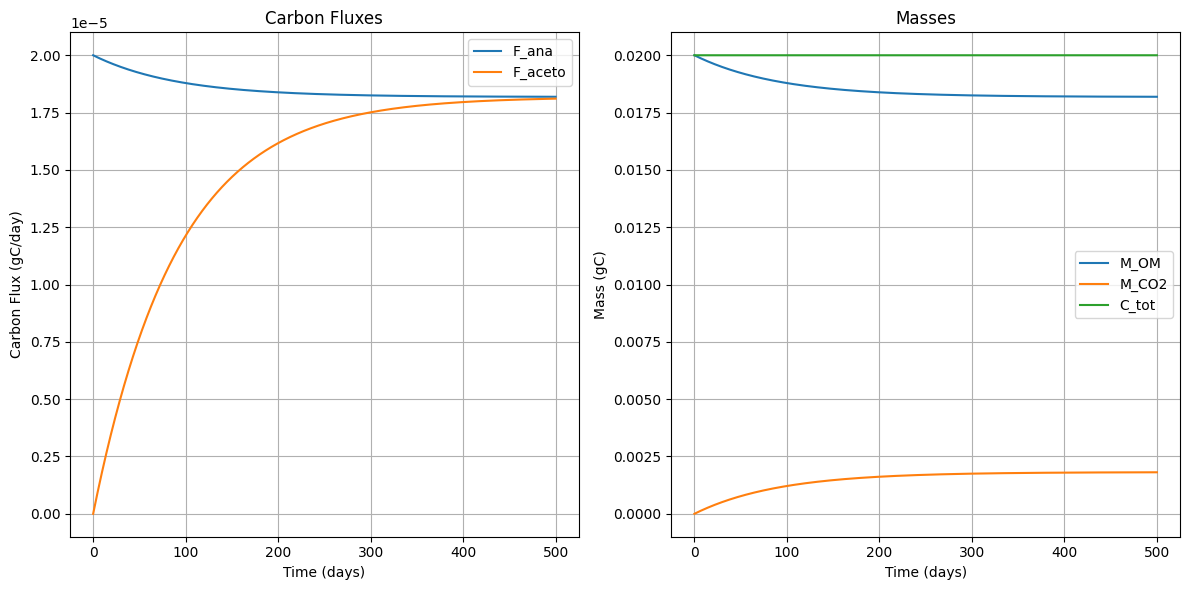

OM scale 0.001
CO2 scale 0.01


In [ ]:
#plot
# Get data from the function
time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, C_tot_values = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, F_ana_initial, F_aceto_initial, C_tot_initial, d_t)

# Create the plotax
fig, (ax, ax1) = plt.subplots(1,2, figsize=(12, 6))  # Adjust figure size if needed

#plotting fluxes
ax.plot(time_points, F_ana_values, label="F_ana")
ax.plot(time_points, F_aceto_values, label="F_aceto")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Carbon Flux (gC/day)")
ax.set_title("Carbon Fluxes")
ax.grid(True)

#plotting mass
ax1.plot(time_points, M_OM_values, label="M_OM")
ax1.plot(time_points, M_CO2_values, label="M_CO2")
ax1.plot(time_points, C_tot_values, label="C_tot")
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Mass (gC)")
ax1.set_title("Masses")
ax1.grid(True)

ax.legend()
ax1.legend()

fig.tight_layout()

plt.show()

#keep track of scale used
print('OM scale ' + str(OM_scale))
print('CO2 scale ' + str(CO2_scale))

#Simple Box Model: Mass + d13C

In [ ]:
#define initial values
M_initial_OM = 0.02 #(g OC)
M_initial_CO2 = 0.000008 #(g C-CO2)
d13C_initial_OM = -25 #(per mil)
d13C_initial_CO2 = -4 #(per mil)

#define time step and duration
t_final = 60000 #(days
d_t = 0.1 #(days?)

#define flux scale factors and eplsilon values
OM_scale = 0.0000071
CO2_scale = 0.0001
a_aceto = 1.0  #1.04-1.06 range
# a_ana = 1.0
# e_aceto = 50

#define initial flux
F_ana_initial = M_initial_OM*OM_scale
F_aceto_initial = M_initial_CO2*CO2_scale

C_tot_initial = M_initial_CO2 + M_initial_OM
d13C_tot_initial = (M_initial_CO2/(M_initial_CO2+M_initial_OM))*d13C_initial_CO2 + (M_initial_OM/(M_initial_CO2+M_initial_OM))*d13C_initial_OM

results = {}

#define functions
def calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, F_ana_initial, F_aceto_initial, d13C_initial_OM, d13C_initial_CO2, C_tot_initial, d13C_tot_initial, a_aceto, d_t):
  t=0
  M_OM = M_initial_OM
  M_CO2 = M_initial_CO2
  F_ana = F_ana_initial
  F_aceto = F_aceto_initial
  d13C_OM = d13C_initial_OM
  d13C_CO2 = d13C_initial_CO2
  C_tot = C_tot_initial
  d13C_tot = d13C_tot_initial

  time_points = []  # Store time points
  M_OM_values = []  # Store M_OM values
  M_CO2_values = []  # Store M_CO2 values
  F_ana_values =  []
  F_aceto_values = []
  d13C_OM_values = []
  d13C_CO2_values = []
  C_tot_values = []
  d13C_tot_values = []

  while t <= t_final:
    F_ana = M_OM*OM_scale
    F_aceto = M_CO2*CO2_scale

    d_OM = (F_aceto - F_ana)*d_t
    d_CO2 = (F_ana - F_aceto)*d_t

    # d_d13C_OM = (((F_aceto/M_OM)*((d13C_CO2-e_aceto)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    # d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((d13C_CO2-e_aceto)-d13C_CO2)))*d_t

    d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # C_tot = M_CO2 + M_OM

    #update M_OM and M_CO2
    M_CO2 = M_CO2 + d_CO2
    M_OM = M_OM + d_OM
    F_ana = M_OM*OM_scale
    F_aceto = M_CO2*CO2_scale
    d13C_OM = d13C_OM + d_d13C_OM
    d13C_CO2 = d13C_CO2 + d_d13C_CO2

    C_tot = M_CO2 + M_OM
    d13C_tot = (M_CO2/(M_CO2+M_OM))*d13C_CO2 + (M_OM/(M_CO2+M_OM))*d13C_OM

    # Store values for plotting
    time_points.append(t)
    M_OM_values.append(M_OM)
    M_CO2_values.append(M_CO2)
    F_ana_values.append(F_ana)
    F_aceto_values.append(F_aceto)
    d13C_OM_values.append(d13C_OM)
    d13C_CO2_values.append(d13C_CO2)
    C_tot_values.append(C_tot)
    d13C_tot_values.append(d13C_tot)

    t += d_t

  return time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, d13C_OM_values, d13C_CO2_values, C_tot_values, d13C_tot_values

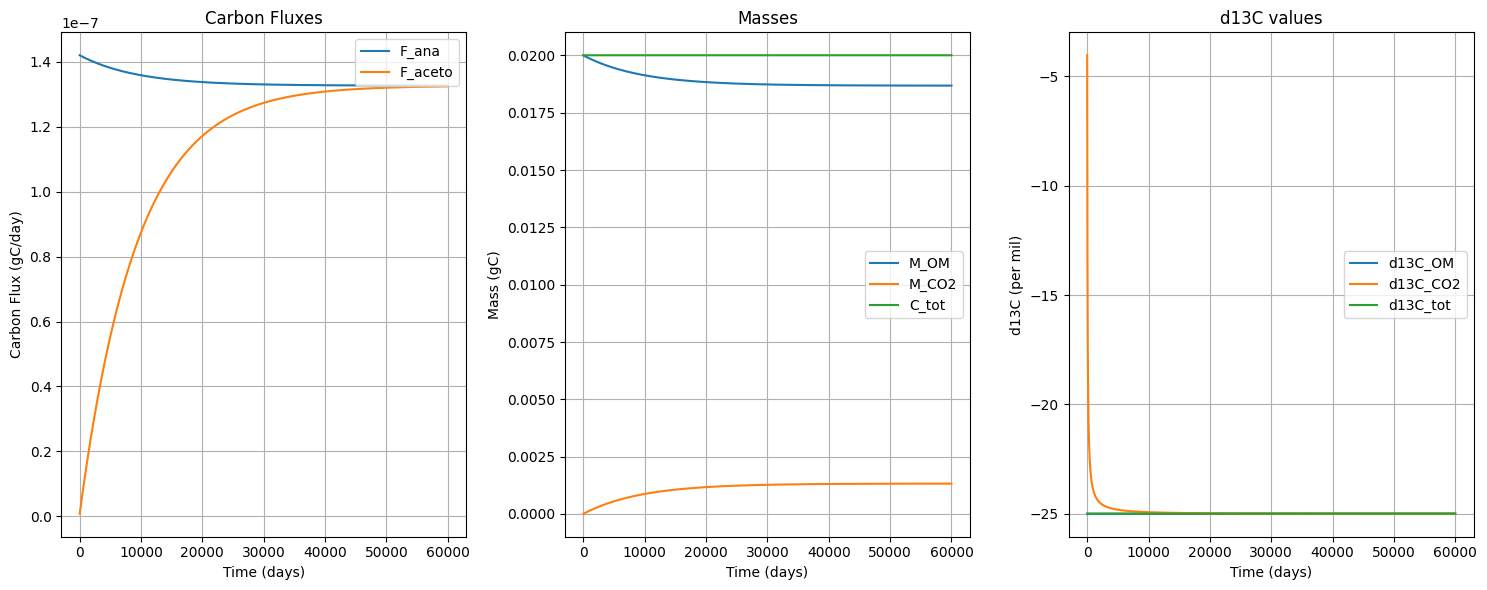

OM scale 7.1e-06
CO2 scale 0.0001


In [ ]:
#plot
# Get data from the function
time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, d13C_OM_values, d13C_CO2_values, C_tot_values, d13C_tot_values = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, F_ana_initial, F_aceto_initial, d13C_initial_OM, d13C_initial_CO2, C_tot_initial, d13C_tot_initial, a_aceto, d_t)
results['run1'] = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, F_ana_initial, F_aceto_initial, d13C_initial_OM, d13C_initial_CO2, C_tot_initial, d13C_tot_initial, a_aceto, d_t)

#access 'run1'
time_points_run1 = results['run1'][0]
M_CO2_values_run1 = results['run1'][1]
M_OM_values_run1 = results['run1'][2]
F_ana_values_run1 = results['run1'][3]
F_aceto_values_run1 = results['run1'][4]
d13C_OM_values_run1 = results['run1'][5]
d13C_CO2_values_run1 = results['run1'][6]
C_tot_values_run1 = results['run1'][7]
d13C_tot_values_run1 = results['run1'][8]

# Create the plotax
fig, (ax, ax1, ax2) = plt.subplots(1,3, figsize=(15, 6))  # Adjust figure size if needed

#plotting fluxes
ax.plot(time_points_run1, F_ana_values_run1, label="F_ana")
ax.plot(time_points_run1, F_aceto_values_run1, label="F_aceto")
ax.set_xlabel("Time (days)")
ax.set_ylabel("Carbon Flux (gC/day)")
ax.set_title("Carbon Fluxes")
ax.grid(True)

#plotting mass
ax1.plot(time_points_run1, M_OM_values_run1, label="M_OM")
ax1.plot(time_points_run1, M_CO2_values_run1, label="M_CO2")
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("Mass (gC)")
ax1.plot(time_points_run1, C_tot_values_run1, label="C_tot")
ax1.set_title("Masses")
ax1.grid(True)

#plot d13C values
ax2.plot(time_points_run1, d13C_OM_values_run1, label="d13C_OM")
ax2.plot(time_points_run1, d13C_CO2_values_run1, label="d13C_CO2")
ax2.plot(time_points_run1, d13C_tot_values_run1, label="d13C_tot")
ax2.set_xlabel("Time (days)")
ax2.set_ylabel("d13C (per mil)")
ax2.set_title("d13C values")
ax2.grid(True)

ax.legend(loc='upper right')
ax1.legend(loc='center right')
ax2.legend(loc='center right')

fig.tight_layout()

plt.show()

#keep track of scale used
print('OM scale ' + str(OM_scale))
print('CO2 scale ' + str(CO2_scale))

#adding incubation data

In [ ]:
#imported incubation data
#calcite corr data
cal_corr_d13C = pd.read_csv('https://docs.google.com/spreadsheets/d/13ehski31YXHgEDe391GDqOOGVpRe23gvdByoFbMx9ks/export?format=csv')
cal_corr_d13C = cal_corr_d13C.reset_index()

#upload co2 page - just parent d13C (ie d13C TOC values)
CO2_data=pd.read_csv('https://docs.google.com/spreadsheets/d/166axHRrWfzw0Ps74HDxz6KXtwtMy9M8sonpnBvHopAQ/export?format=csv')
CO2_data = CO2_data.reset_index()
# CO2_data

#C data - initial organic carbon (dry mass) and total g CO2 (using this to extract day 1 CO2 data for box model, also need to covert g CO2 to g C-CO2)
C_data = pd.read_csv('https://docs.google.com/spreadsheets/d/1vsOCAcY1vsjcHzt8xQ1_JaJTA77KrdJMgjj5V-rktG0/export?format=csv')
C_data = C_data.reset_index()
#drop added day zero
columns_to_modify = ['incubation time', 'tot g CO2']  # Add more column names here

#CO2 and standard error data over time in g C-CO2 (used for observed data plotting)
C_CO2_final = pd.read_csv('https://docs.google.com/spreadsheets/d/14OJj7lvJ5_Cfv5B-X2AXkMGuuU0QyLOYcLZxulXSKx8/export?format=csv')
C_CO2_final = C_CO2_final.reset_index()


for column in columns_to_modify:
    C_data[column] = C_data[column].replace(0, np.nan)



In [ ]:
#merge
C_data = pd.merge(C_data, C_CO2_final, on=['Name', 'incubation time'], how='inner')

C_data

,index_x,Name,incubation time,initial_organic_C_g_dry_mass,tot g CO2,tot g CO2 non calcite,headspace g CO2 non calcite,index_y,total C-CO2 (g),std total C-CO2 (g),SE total C-CO2 (g)
0,1,SL1_d0_25C,1.0,0.006329,NaN,NaN,NaN,160,NaN,NaN,NaN
1,2,SL1_d0_25C,8.0,0.006329,NaN,NaN,NaN,161,NaN,NaN,NaN
2,4,SL1_d0_25C,15.0,0.006329,NaN,NaN,NaN,162,NaN,NaN,NaN
3,7,SL1_d0_25C,29.0,0.006329,NaN,NaN,NaN,163,NaN,NaN,NaN
4,8,SL1_d0_25C,30.0,0.006329,NaN,NaN,NaN,164,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
317,409,SL4_dC_2C,88.0,0.051015,NaN,NaN,NaN,587,NaN,NaN,NaN
318,410,SL4_dC_2C,96.0,0.051015,0.000020,0.000021,0.000003,588,0.000005,0.000001,7.680000e-07
319,411,SL4_dC_2C,134.0,0.051015,NaN,NaN,NaN,589,NaN,NaN,NaN
320,412,SL4_dC_2C,161.0,0.051015,NaN,NaN,NaN,590,NaN,NaN,NaN


In [ ]:
#rename columns
cal_corr_d13C.rename(columns={'d13C-CO2': 'cal corr d13C-CO2', 'std d13C-CO2':'cal corr std d13C-CO2', 'SE d13C-CO2':'cal corr SE d13C-CO2', 'incubation time':'Days of incubation'}, inplace=True)

cal_corr_d13C

,index,Name,Days of incubation,cal corr d13C-CO2,cal corr std d13C-CO2,cal corr SE d13C-CO2
0,0,BTL_dA_25C,1,-22.7057,NaN,NaN
1,1,BTL_dA_25C,8,NaN,NaN,NaN
2,2,BTL_dA_25C,11,NaN,NaN,NaN
3,3,BTL_dA_25C,15,NaN,NaN,NaN
4,4,BTL_dA_25C,17,-23.5027,NaN,NaN
...,...,...,...,...,...,...
736,736,SL4_dC_inoc_25C,88,NaN,NaN,NaN
737,737,SL4_dC_inoc_25C,96,NaN,NaN,NaN
738,738,SL4_dC_inoc_25C,134,NaN,NaN,NaN
739,739,SL4_dC_inoc_25C,161,NaN,NaN,NaN


In [ ]:
#just need day 1 d13C CO2
# Define a function to get the first non-NaN value for each name
def get_first_non_nan(df, id_col, value_col, time_col):
    # Sort by ID and time to ensure correct order
    df_sorted = df.sort_values(by=[id_col, time_col])
    # Group by ID and get the first non-NaN value in the value column
    first_non_nan_values = df_sorted.groupby(id_col)[value_col].first().reset_index()
    return first_non_nan_values


# Get the first non-NaN 'cal corr d13C-CO2' for each 'Name'
filtered_cal_corr_d13C = get_first_non_nan(cal_corr_d13C, 'Name', 'cal corr d13C-CO2', 'Days of incubation')

#rename
merged_d13C = filtered_cal_corr_d13C.copy()

merged_d13C

,Name,cal corr d13C-CO2
0,BTL_dA_25C,-22.70570
1,BTL_dA_6C,-22.21130
2,BTL_dB_25C,-6.71122
3,BTL_dB_6C,-0.89618
4,BTL_dC_25C,-6.24768
5,BTL_dC_6C,-6.97796
6,BTL_dD_25C,-10.40180
7,BTL_dD_6C,-1.24918
8,BTL_dE_25C,-8.77846
9,BTL_dE_6C,-6.40464


In [ ]:
merged_d13C['Name'] = merged_d13C['Name'].str.strip() #invisiable space in SL1_dA_2C name


In [ ]:
#initial C from C_data (day 1)
filtered_C = C_data[(C_data['incubation time'] == 1)]
filtered_CO2 = CO2_data[(CO2_data['incubation time'] == 1)]

filtered_CO2 = filtered_CO2[['Name', 'parent d13C']]
initial_C1 = filtered_C[['Name', 'incubation time', 'tot g CO2', 'tot g CO2 non calcite', 'headspace g CO2 non calcite', 'initial_organic_C_g_dry_mass']]

initial_C2 = pd.merge(initial_C1, filtered_CO2, on='Name')

initial_C = pd.merge(initial_C2, merged_d13C, on='Name')

# initial_C['joint avg d13C'] = pd.to_numeric(initial_C['joint avg d13C'], errors='coerce')
initial_C['cal corr d13C-CO2'] = pd.to_numeric(initial_C['cal corr d13C-CO2'], errors='coerce')

initial_C

,Name,incubation time,tot g CO2,tot g CO2 non calcite,headspace g CO2 non calcite,initial_organic_C_g_dry_mass,parent d13C,cal corr d13C-CO2
0,SL1_d0_25C,1.0,NaN,NaN,NaN,0.006329,-26.02,NaN
1,SL1_d0_6C,1.0,NaN,NaN,NaN,0.004486,-26.02,NaN
2,SL1_dA_25C,1.0,0.000058,0.000064,0.000013,0.035119,-25.64,-15.46430
3,SL1_dA_6C,1.0,0.000046,0.000052,0.000010,0.036184,-25.64,-16.45590
4,SL1_dA_2C,1.0,0.000047,0.000053,0.000010,0.035971,-25.64,-17.55030
5,SL1_dB_25C,1.0,0.000145,0.000180,0.000029,0.015880,-24.83,-17.90000
6,SL1_dB_6C,1.0,0.000097,0.000122,0.000018,0.015434,-24.83,-20.43790
7,SL1_dB_2C,1.0,0.000101,0.000129,0.000018,0.016058,-24.83,-20.96530
8,SL1_dC_25C,1.0,0.000248,0.000314,0.000046,0.052291,-24.91,-10.73590
9,SL1_dC_6C,1.0,0.000197,0.000253,0.000034,0.050302,-24.91,-16.71020


In [ ]:
#join rate constants df and initial C df

C_k = initial_C.copy()
C_k = pd.merge(C_k, C_CO2_final, on=['Name', 'incubation time'], how='inner')

#drop names with nans in tot g C
C_k = C_k.dropna(subset=['tot g CO2 non calcite'])

#
C_k



,Name,incubation time,tot g CO2,tot g CO2 non calcite,headspace g CO2 non calcite,initial_organic_C_g_dry_mass,parent d13C,cal corr d13C-CO2,index,total C-CO2 (g),std total C-CO2 (g),SE total C-CO2 (g)
2,SL1_dA_25C,1.0,0.000058,0.000064,0.000013,0.035119,-25.64,-15.46430,192,0.000016,1.370000e-06,7.930000e-07
3,SL1_dA_6C,1.0,0.000046,0.000052,0.000010,0.036184,-25.64,-16.45590,224,0.000012,2.140000e-06,1.240000e-06
4,SL1_dA_2C,1.0,0.000047,0.000053,0.000010,0.035971,-25.64,-17.55030,208,0.000013,2.030000e-06,1.170000e-06
5,SL1_dB_25C,1.0,0.000145,0.000180,0.000029,0.015880,-24.83,-17.90000,256,0.000039,1.110000e-05,6.400000e-06
6,SL1_dB_6C,1.0,0.000097,0.000122,0.000018,0.015434,-24.83,-20.43790,288,0.000027,2.300000e-06,1.330000e-06
7,SL1_dB_2C,1.0,0.000101,0.000129,0.000018,0.016058,-24.83,-20.96530,272,0.000028,1.410000e-06,8.130000e-07
8,SL1_dC_25C,1.0,0.000248,0.000314,0.000046,0.052291,-24.91,-10.73590,320,0.000068,8.710000e-06,5.030000e-06
9,SL1_dC_6C,1.0,0.000197,0.000253,0.000034,0.050302,-24.91,-16.71020,368,0.000054,1.320000e-05,7.610000e-06
10,SL1_dC_2C,1.0,0.000171,0.000221,0.000029,0.052576,-24.91,-16.66490,352,0.000047,3.360000e-06,1.940000e-06
11,SL1_dC_25C_wet,1.0,0.000318,0.000447,0.000044,0.047176,-24.91,-18.19560,336,0.000087,4.060000e-06,2.350000e-06


In [ ]:
#convert to g C from CO2
C_k['tot g C-CO2'] = (C_k['tot g CO2'])*(12.01/44.01)

#Final Box Model (incubation data, Scenarios 1, 2, & 3)

In [ ]:
#k / scenario 1: no homoacetogenesis
initial_d13C_CO2_mapping ={}
initial_CO2_mapping = {}

OM_scale_start_mapping = {
    'SL1_dA_25C': 6.86e-6, #1e-5,
    'SL1_dA_6C': 1.2e-5,
    'SL1_dA_2C': 1.2e-5,
    'SL1_dB_25C': 4e-6, #skip
    'SL1_dB_6C': 1.5e-4, #skip
    'SL1_dB_2C': 0, #skip
    'SL1_dC_25C': 2.5e-5, #1.64e-5, #4e-5,
    'SL1_dC_6C': 2e-6, #0, #3e-5,
    'SL1_dC_2C': 1.5e-5, #1e-5,
    'SL1_dC_25C_wet': 0.96, #skip
    'SL4_dA_25C': 1e-5, #skip
    'SL4_dA_6C': 1e-5, #skip
    'SL4_dA_2C': 1e-6, #skip
    'SL4_dB_25C': 9e-6, #skip
    'SL4_dB_6C': 5e-6, #skip
    'SL4_dB_2C': 8e-6, #skip
    'SL4_dC_25C': 1.13e-5, #1e-5,
    'SL4_dC_6C': 8.5e-7, #2.5e-6, #5.5e-6,
    'SL4_dC_2C': 2.8e-6, #1e-6,
}

OM_scale_second_mapping = {
    'SL1_dA_25C': 6.86e-6, #1e-5,
    'SL1_dA_6C': 0, #1.7e-5,
    'SL1_dA_2C': 0, #2e-5,
    'SL1_dB_25C': 3e-6, #skip
    'SL1_dB_6C': 1.5e-4, #skip
    'SL1_dB_2C': 0, #skip
    'SL1_dC_25C': 4.64e-6, #4e-5,
    'SL1_dC_6C': 0, #3e-5,
    'SL1_dC_2C': 0, #1e-5,
    'SL1_dC_25C_wet': 0.96, #skip
    'SL4_dA_25C': 1e-5, #skip
    'SL4_dA_6C': 1e-5, #skip
    'SL4_dA_2C': 1e-6, #skip
    'SL4_dB_25C': 9e-6, #skip
    'SL4_dB_6C': 5e-6, #skip
    'SL4_dB_2C': 8e-6, #skip
    'SL4_dC_25C': 1.13e-5, #1e-5,
    'SL4_dC_6C': 8.5e-7, #5.3e-7, #0, #2.41e-7, #2e-6,
    'SL4_dC_2C': 0, #1.18e-8, #1e-6,
}

OM_scale_third_mapping = {
    'SL1_dA_25C': 1.2e-5,
    'SL1_dA_6C': 2e-6,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 2e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-6,
    'SL1_dC_2C': 5e-6,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 7e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 3e-6,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 3e-6, #0,
    'SL4_dC_2C': 3e-6, #0,
}

OM_scale_mid_mapping = {
    'SL1_dA_25C': 4e-6,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 1e-5,
    'SL1_dB_6C': 9e-7,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 3e-9,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 3e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 9e-6,
    'SL4_dC_6C': 4e-6, #0,
    'SL4_dC_2C': 0,
}

OM_scale_mid_last_mapping = {
    'SL1_dA_25C': 1e-5,
    'SL1_dA_6C': 9e-7,
    'SL1_dA_2C': 2e-9,
    'SL1_dB_25C': 3e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 2e-6,
    'SL1_dC_25C': 8e-6,
    'SL1_dC_6C': 4e-6,
    'SL1_dC_2C': 5e-6,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 8e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 5e-7, #0,
    'SL4_dC_2C': 0,
}

OM_scale_mapping = {
    'SL1_dA_25C': 4e-6,
    'SL1_dA_6C': 1e-9,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 2e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 3e-6,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 1e-5,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 3e-7, #0,
    'SL4_dC_2C': 0,
}

CO2_scale_start_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 0, #6e-2,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0, #0.96,
    'SL4_dA_25C': 0, #1e-5,
    'SL4_dA_6C': 0, #1e-5,
    'SL4_dA_2C': 0, #1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_second_mapping = {
    'SL1_dA_25C': 0, #0.8e-3,
    'SL1_dA_6C': 0, #2e-3, #1.8e-3, #good fit : 2e-3,
    'SL1_dA_2C': 0, #3.5e-3, #3.5e-3, #good fit : 3.5e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 0,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0, #
    'SL4_dA_25C': 0,
    'SL4_dA_6C': 0,
    'SL4_dA_2C': 0,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_third_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 7e-4,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-4,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 1e-2,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 3e-2, #0,
}

CO2_scale_mid_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 5e-3,
    'SL1_dA_2C': 9e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 3e-4,
    'SL1_dB_2C': 5e-3,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-3,
    'SL1_dC_2C': 6e-3,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 1e-5,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 4e-2, #0,
    'SL4_dC_2C': 1e-3, #0,
}

CO2_scale_mid_last_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 3e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 2e-3,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 1e-3,
    'SL1_dA_2C': 3e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 5e-3,
    'SL1_dB_2C': 1.5e-3,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-3,
    'SL1_dC_2C': 2e-3,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 9e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

#define time step and duration
t_final = 200 #60000 #(days
d_t = 0.1 #(days?)

#define flux scale factors and eplsilon values
# OM_scale = 0.0000055
# CO2_scale = 0.000000000001
a_aceto = 1.005 #1.004  #1.04-1.06 range
# a_ana = 1.0
# e_aceto = 50

#define initial flux
# F_ana_initial = M_initial_OM*OM_scale
# F_aceto_initial = M_initial_CO2*CO2_scale

# C_tot_initial = M_initial_CO2 + M_initial_OM
# d13C_tot_initial = (M_initial_CO2/(M_initial_CO2+M_initial_OM))*d13C_initial_CO2 + (M_initial_OM/(M_initial_CO2+M_initial_OM))*d13C_initial_OM
#results = {}
#define functions
def calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d13C_initial_OM, d13C_initial_CO2, a_aceto, d_t):
  t=0
  M_OM = M_initial_OM
  M_CO2 = M_initial_CO2
  F_ana = M_OM*OM_scale_start
  F_aceto = M_CO2*CO2_scale_start
  d13C_OM = d13C_initial_OM
  d13C_CO2 = d13C_initial_CO2

  time_points = []  # Store time points
  M_OM_values = []  # Store M_OM values
  M_CO2_values = []  # Store M_CO2 values
  F_ana_values =  []
  F_aceto_values = []
  d13C_OM_values = []
  d13C_CO2_values = []
  OM_scale_values = []
  CO2_scale_values = []


  while t <= t_final:

    if t <= 15:
      F_ana = M_OM*OM_scale_start
      F_aceto = M_CO2*CO2_scale_start

      d_OM = (F_aceto-F_ana)*d_t
      d_CO2 = (F_ana-F_aceto)*d_t

      d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
      d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t


    elif t > 15 and t <= t_final:
      F_ana = M_OM*OM_scale_second
      F_aceto = M_CO2*CO2_scale_second

      # F_ana = M_OM*OM_scale_start
      # F_aceto = M_CO2*CO2_scale_start

      d_OM = (F_aceto-F_ana)*d_t
      d_CO2 = (F_ana-F_aceto)*d_t

      d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
      d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 15 and t <= 29:
    #   F_ana = M_OM*OM_scale_third
    #   F_aceto = M_CO2*CO2_scale_third

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 29 and t <= 58:
    #   F_ana = M_OM*OM_scale_mid
    #   F_aceto = M_CO2*CO2_scale_mid

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 58 and t <= 96:
    #   F_ana = M_OM*OM_scale_mid_last
    #   F_aceto = M_CO2*CO2_scale_mid_last

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 96 and t <= t_final:
    #   F_ana = M_OM*OM_scale
    #   F_aceto = M_CO2*CO2_scale

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t


    #update M_OM and M_CO2
    M_CO2 = M_CO2 + d_CO2
    M_OM = M_OM + d_OM
    d13C_OM = d13C_OM + d_d13C_OM
    d13C_CO2 = d13C_CO2 + d_d13C_CO2


    # Store values for plotting
    time_points.append(t)
    M_OM_values.append(M_OM)
    M_CO2_values.append(M_CO2)
    F_ana_values.append(F_ana)
    F_aceto_values.append(F_aceto)
    d13C_OM_values.append(d13C_OM)
    d13C_CO2_values.append(d13C_CO2)
    OM_scale_values.append(OM_scale)
    CO2_scale_values.append(CO2_scale)

    t += d_t

  return time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, d13C_OM_values, d13C_CO2_values

# Create models for each sample
results = {}
for index, row in C_k.iterrows():
  name = row['Name']
  OM_scale = OM_scale_mapping.get(name, 0) #row['k DOC']*
  OM_scale_start = OM_scale_start_mapping.get(name,0) #row['k DOC start']
  OM_scale_second = OM_scale_second_mapping.get(name,0) #row['k DOC mid']*
  OM_scale_third = OM_scale_third_mapping.get(name,0) #row['k DOC mid']*
  OM_scale_mid = OM_scale_mid_mapping.get(name,0)
  OM_scale_mid_last = OM_scale_mid_last_mapping.get(name,0)
  CO2_scale_start = CO2_scale_start_mapping.get(name, 0) #row['k DOC start']*
  CO2_scale_second = CO2_scale_second_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_third = CO2_scale_third_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_mid = CO2_scale_mid_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_mid_last = CO2_scale_mid_last_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale = CO2_scale_mapping.get(name, 0) #0.9688 row['k DOC']*
  d13C_initial_CO2 = row['cal corr d13C-CO2'] + initial_d13C_CO2_mapping.get(name,0) #row['joint avg d13C'] #+ d13C_mapping.get(name, 0)
  M_initial_CO2 = row['tot g C-CO2'] + initial_CO2_mapping.get(name, 0) #0.000002 #trying tot CO2 in grams C-CO2 #row['headspace g CO2 non calcite'] #row['tot g CO2'] #row['tot g CO2 non calcite']  #*initial_OM_scale_mapping.get(name, 0) # Use initial total C as initial CO2
  M_initial_OM = row['initial_organic_C_g_dry_mass']
  d13C_initial_OM = row['parent d13C'] #+ d13C_mapping.get(name, 0)

  results[name] = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d13C_initial_OM, d13C_initial_CO2, a_aceto, d_t)

In [ ]:
#k / scenario 2: with homoacetogenesis, literature alpha homo values
OM_scale_start_mapping = {
    'SL1_dA_25C': 6.86e-6, #1e-5,
    'SL1_dA_6C': 1.2e-5,
    'SL1_dA_2C': 1.2e-5,
    'SL1_dB_25C': 4e-6, #skip
    'SL1_dB_6C': 1.5e-4, #skip
    'SL1_dB_2C': 0, #skip
    'SL1_dC_25C': 1.64e-5, #4e-5,
    'SL1_dC_6C': 2e-6, #0, #3e-5,
    'SL1_dC_2C': 1.5e-5, #1e-5,
    'SL1_dC_25C_wet': 0.96, #skip
    'SL4_dA_25C': 1e-5, #skip
    'SL4_dA_6C': 1e-5, #skip
    'SL4_dA_2C': 1e-6, #skip
    'SL4_dB_25C': 9e-6, #skip
    'SL4_dB_6C': 5e-6, #skip
    'SL4_dB_2C': 8e-6, #skip
    'SL4_dC_25C': 1.13e-5, #1e-5,
    'SL4_dC_6C': 8.5e-7, #2.5e-6, #5.5e-6,
    'SL4_dC_2C': 2.8e-6, #1e-6,
}

OM_scale_second_mapping = {
    'SL1_dA_25C': 6.86e-6, #1e-5,
    'SL1_dA_6C': 0, #1.7e-5,
    'SL1_dA_2C': 0, #2e-5,
    'SL1_dB_25C': 3e-6, #skip
    'SL1_dB_6C': 1.5e-4, #skip
    'SL1_dB_2C': 0, #skip
    'SL1_dC_25C': 4.64e-6, #4e-5,
    'SL1_dC_6C': 0, #3e-5,
    'SL1_dC_2C': 0, #1e-5,
    'SL1_dC_25C_wet': 0.96, #skip
    'SL4_dA_25C': 1e-5, #skip
    'SL4_dA_6C': 1e-5, #skip
    'SL4_dA_2C': 1e-6, #skip
    'SL4_dB_25C': 9e-6, #skip
    'SL4_dB_6C': 5e-6, #skip
    'SL4_dB_2C': 8e-6, #skip
    'SL4_dC_25C': 1.13e-5, #1e-5,
    'SL4_dC_6C': 8.5e-7, #5.3e-7, #0, #2.41e-7, #2e-6,
    'SL4_dC_2C': 0, #1.18e-8, #1e-6,
}

OM_scale_third_mapping = {
    'SL1_dA_25C': 1.2e-5,
    'SL1_dA_6C': 2e-6,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 2e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-6,
    'SL1_dC_2C': 5e-6,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 7e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 3e-6,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 3e-6, #0,
    'SL4_dC_2C': 3e-6, #0,
}

OM_scale_mid_mapping = {
    'SL1_dA_25C': 4e-6,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 1e-5,
    'SL1_dB_6C': 9e-7,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 3e-9,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 3e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 9e-6,
    'SL4_dC_6C': 4e-6, #0,
    'SL4_dC_2C': 0,
}

OM_scale_mid_last_mapping = {
    'SL1_dA_25C': 1e-5,
    'SL1_dA_6C': 9e-7,
    'SL1_dA_2C': 2e-9,
    'SL1_dB_25C': 3e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 2e-6,
    'SL1_dC_25C': 8e-6,
    'SL1_dC_6C': 4e-6,
    'SL1_dC_2C': 5e-6,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 8e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 5e-7, #0,
    'SL4_dC_2C': 0,
}

OM_scale_mapping = {
    'SL1_dA_25C': 4e-6,
    'SL1_dA_6C': 1e-9,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 2e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 3e-6,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 1e-5,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 3e-7, #0,
    'SL4_dC_2C': 0,
}

CO2_scale_start_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 0, #6e-2,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0, #0.96,
    'SL4_dA_25C': 0, #1e-5,
    'SL4_dA_6C': 0, #1e-5,
    'SL4_dA_2C': 0, #1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_second_mapping = {
    'SL1_dA_25C': 0, #0.8e-3,
    'SL1_dA_6C': 2e-3, #1.8e-3, #good fit : 2e-3,
    'SL1_dA_2C': 3.5e-3, #3.5e-3, #good fit : 3.5e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 0,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0, #
    'SL4_dA_25C': 0,
    'SL4_dA_6C': 0,
    'SL4_dA_2C': 0,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_third_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 7e-4,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-4,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 1e-2,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 3e-2, #0,
}

CO2_scale_mid_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 5e-3,
    'SL1_dA_2C': 9e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 3e-4,
    'SL1_dB_2C': 5e-3,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-3,
    'SL1_dC_2C': 6e-3,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 1e-5,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 4e-2, #0,
    'SL4_dC_2C': 1e-3, #0,
}

CO2_scale_mid_last_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 3e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 2e-3,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 1e-3,
    'SL1_dA_2C': 3e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 5e-3,
    'SL1_dB_2C': 1.5e-3,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-3,
    'SL1_dC_2C': 2e-3,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 9e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

#define time step and duration
t_final = 200 #60000 #(days
d_t = 0.1 #(days?)

#define flux scale factors and eplsilon values
# OM_scale = 0.0000055
# CO2_scale = 0.000000000001
a_aceto = 1.05 #1.004  #1.04-1.06 range
# a_ana = 1.0
# e_aceto = 50

#define initial flux
# F_ana_initial = M_initial_OM*OM_scale
# F_aceto_initial = M_initial_CO2*CO2_scale

# C_tot_initial = M_initial_CO2 + M_initial_OM
# d13C_tot_initial = (M_initial_CO2/(M_initial_CO2+M_initial_OM))*d13C_initial_CO2 + (M_initial_OM/(M_initial_CO2+M_initial_OM))*d13C_initial_OM
#results = {}
#define functions
def calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d13C_initial_OM, d13C_initial_CO2, a_aceto, d_t):
  t=0
  M_OM = M_initial_OM
  M_CO2 = M_initial_CO2
  F_ana = M_OM*OM_scale_start
  F_aceto = M_CO2*CO2_scale_start
  d13C_OM = d13C_initial_OM
  d13C_CO2 = d13C_initial_CO2

  time_points = []  # Store time points
  M_OM_values = []  # Store M_OM values
  M_CO2_values = []  # Store M_CO2 values
  F_ana_values =  []
  F_aceto_values = []
  d13C_OM_values = []
  d13C_CO2_values = []
  OM_scale_values = []
  CO2_scale_values = []


  while t <= t_final:

    if t <= 15:
      F_ana = M_OM*OM_scale_start
      F_aceto = M_CO2*CO2_scale_start

      d_OM = (F_aceto-F_ana)*d_t
      d_CO2 = (F_ana-F_aceto)*d_t

      d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
      d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t


    elif t > 15 and t <= t_final:
      F_ana = M_OM*OM_scale_second
      F_aceto = M_CO2*CO2_scale_second

      # F_ana = M_OM*OM_scale_start
      # F_aceto = M_CO2*CO2_scale_start

      d_OM = (F_aceto-F_ana)*d_t
      d_CO2 = (F_ana-F_aceto)*d_t

      d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
      d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 15 and t <= 29:
    #   F_ana = M_OM*OM_scale_third
    #   F_aceto = M_CO2*CO2_scale_third

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 29 and t <= 58:
    #   F_ana = M_OM*OM_scale_mid
    #   F_aceto = M_CO2*CO2_scale_mid

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 58 and t <= 96:
    #   F_ana = M_OM*OM_scale_mid_last
    #   F_aceto = M_CO2*CO2_scale_mid_last

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 96 and t <= t_final:
    #   F_ana = M_OM*OM_scale
    #   F_aceto = M_CO2*CO2_scale

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t


    #update M_OM and M_CO2
    M_CO2 = M_CO2 + d_CO2
    M_OM = M_OM + d_OM
    d13C_OM = d13C_OM + d_d13C_OM
    d13C_CO2 = d13C_CO2 + d_d13C_CO2


    # Store values for plotting
    time_points.append(t)
    M_OM_values.append(M_OM)
    M_CO2_values.append(M_CO2)
    F_ana_values.append(F_ana)
    F_aceto_values.append(F_aceto)
    d13C_OM_values.append(d13C_OM)
    d13C_CO2_values.append(d13C_CO2)
    OM_scale_values.append(OM_scale)
    CO2_scale_values.append(CO2_scale)

    t += d_t

  return time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, d13C_OM_values, d13C_CO2_values

# Create models for each sample
results_lit_homo = {}
for index, row in C_k.iterrows():
  name = row['Name']
  OM_scale = OM_scale_mapping.get(name, 0) #row['k DOC']*
  OM_scale_start = OM_scale_start_mapping.get(name,0) #row['k DOC start']
  OM_scale_second = OM_scale_second_mapping.get(name,0) #row['k DOC mid']*
  OM_scale_third = OM_scale_third_mapping.get(name,0) #row['k DOC mid']*
  OM_scale_mid = OM_scale_mid_mapping.get(name,0)
  OM_scale_mid_last = OM_scale_mid_last_mapping.get(name,0)
  CO2_scale_start = CO2_scale_start_mapping.get(name, 0) #row['k DOC start']*
  CO2_scale_second = CO2_scale_second_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_third = CO2_scale_third_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_mid = CO2_scale_mid_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_mid_last = CO2_scale_mid_last_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale = CO2_scale_mapping.get(name, 0) #0.9688 row['k DOC']*
  d13C_initial_CO2 = row['cal corr d13C-CO2'] + initial_d13C_CO2_mapping.get(name,0) #row['joint avg d13C'] #+ d13C_mapping.get(name, 0)
  M_initial_CO2 = row['tot g C-CO2'] + initial_CO2_mapping.get(name, 0) #0.000002 #trying tot CO2 in grams C-CO2 #row['headspace g CO2 non calcite'] #row['tot g CO2'] #row['tot g CO2 non calcite']  #*initial_OM_scale_mapping.get(name, 0) # Use initial total C as initial CO2
  M_initial_OM = row['initial_organic_C_g_dry_mass']
  d13C_initial_OM = row['parent d13C'] #+ d13C_mapping.get(name, 0)

  results_lit_homo[name] = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d13C_initial_OM, d13C_initial_CO2, a_aceto, d_t)


In [ ]:
#scenario 3: with homoacetogenesis, best fit alpha homo values

initial_CO2_mapping = {
}

initial_d13C_CO2_mapping = {
}

#k / simple attempt
OM_scale_start_mapping = {
    'SL1_dA_25C': 6.86e-6, #1e-5,
    'SL1_dA_6C': 1.2e-5,
    'SL1_dA_2C': 1.2e-5,
    'SL1_dB_25C': 4e-6, #skip
    'SL1_dB_6C': 1.5e-4, #skip
    'SL1_dB_2C': 0, #skip
    'SL1_dC_25C': 1.64e-5, #4e-5,
    'SL1_dC_6C': 2e-6, #0, #3e-5,
    'SL1_dC_2C': 1.5e-5, #1e-5,
    'SL1_dC_25C_wet': 0.96, #skip
    'SL4_dA_25C': 1e-5, #skip
    'SL4_dA_6C': 1e-5, #skip
    'SL4_dA_2C': 1e-6, #skip
    'SL4_dB_25C': 9e-6, #skip
    'SL4_dB_6C': 5e-6, #skip
    'SL4_dB_2C': 8e-6, #skip
    'SL4_dC_25C': 1.13e-5, #1e-5,
    'SL4_dC_6C': 8.5e-7, #2.5e-6, #5.5e-6,
    'SL4_dC_2C': 2.8e-6, #1e-6,
}

OM_scale_second_mapping = {
    'SL1_dA_25C': 6.86e-6, #1e-5,
    'SL1_dA_6C': 0, #1.7e-5,
    'SL1_dA_2C': 0, #2e-5,
    'SL1_dB_25C': 3e-6, #skip
    'SL1_dB_6C': 1.5e-4, #skip
    'SL1_dB_2C': 0, #skip
    'SL1_dC_25C': 4.64e-6, #4e-5,
    'SL1_dC_6C': 0, #3e-5,
    'SL1_dC_2C': 0, #1e-5,
    'SL1_dC_25C_wet': 0.96, #skip
    'SL4_dA_25C': 1e-5, #skip
    'SL4_dA_6C': 1e-5, #skip
    'SL4_dA_2C': 1e-6, #skip
    'SL4_dB_25C': 9e-6, #skip
    'SL4_dB_6C': 5e-6, #skip
    'SL4_dB_2C': 8e-6, #skip
    'SL4_dC_25C': 1.13e-5, #1e-5,
    'SL4_dC_6C': 8.5e-7, #5.3e-7, #0, #2.41e-7, #2e-6,
    'SL4_dC_2C': 0, #1.18e-8, #1e-6,
}

OM_scale_third_mapping = {
    'SL1_dA_25C': 1.2e-5,
    'SL1_dA_6C': 2e-6,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 2e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-6,
    'SL1_dC_2C': 5e-6,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 7e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 3e-6,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 3e-6, #0,
    'SL4_dC_2C': 3e-6, #0,
}

OM_scale_mid_mapping = {
    'SL1_dA_25C': 4e-6,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 1e-5,
    'SL1_dB_6C': 9e-7,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 3e-9,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 3e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 9e-6,
    'SL4_dC_6C': 4e-6, #0,
    'SL4_dC_2C': 0,
}

OM_scale_mid_last_mapping = {
    'SL1_dA_25C': 1e-5,
    'SL1_dA_6C': 9e-7,
    'SL1_dA_2C': 2e-9,
    'SL1_dB_25C': 3e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 2e-6,
    'SL1_dC_25C': 8e-6,
    'SL1_dC_6C': 4e-6,
    'SL1_dC_2C': 5e-6,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 8e-6,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 5e-7, #0,
    'SL4_dC_2C': 0,
}

OM_scale_mapping = {
    'SL1_dA_25C': 4e-6,
    'SL1_dA_6C': 1e-9,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 2e-5,
    'SL1_dB_6C': 9e-9,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 3e-6,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 1e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 1e-5,
    'SL4_dB_6C': 1e-9,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 1e-5,
    'SL4_dC_6C': 3e-7, #0,
    'SL4_dC_2C': 0,
}

CO2_scale_start_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 0, #6e-2,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0, #0.96,
    'SL4_dA_25C': 0, #1e-5,
    'SL4_dA_6C': 0, #1e-5,
    'SL4_dA_2C': 0, #1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_second_mapping = {
    'SL1_dA_25C': 0, #0.8e-3,
    'SL1_dA_6C': 2e-3, #1.8e-3, #good fit : 2e-3,
    'SL1_dA_2C': 3.5e-3, #3.5e-3, #good fit : 3.5e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 0,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0, #
    'SL4_dA_25C': 0,
    'SL4_dA_6C': 0,
    'SL4_dA_2C': 0,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_third_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 0,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 7e-4,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-4,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 1e-2,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 3e-2, #0,
}

CO2_scale_mid_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 5e-3,
    'SL1_dA_2C': 9e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 3e-4,
    'SL1_dB_2C': 5e-3,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-3,
    'SL1_dC_2C': 6e-3,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 1e-5,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 4e-2, #0,
    'SL4_dC_2C': 1e-3, #0,
}

CO2_scale_mid_last_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 0,
    'SL1_dA_2C': 3e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 2e-3,
    'SL1_dB_2C': 0,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 0,
    'SL1_dC_2C': 0,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 3e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

CO2_scale_mapping = {
    'SL1_dA_25C': 0,
    'SL1_dA_6C': 1e-3,
    'SL1_dA_2C': 3e-3,
    'SL1_dB_25C': 0,
    'SL1_dB_6C': 5e-3,
    'SL1_dB_2C': 1.5e-3,
    'SL1_dC_25C': 0,
    'SL1_dC_6C': 2e-3,
    'SL1_dC_2C': 2e-3,
    'SL1_dC_25C_wet': 0.96,
    'SL4_dA_25C': 9e-5,
    'SL4_dA_6C': 1e-5,
    'SL4_dA_2C': 1e-5,
    'SL4_dB_25C': 0,
    'SL4_dB_6C': 0,
    'SL4_dB_2C': 0,
    'SL4_dC_25C': 0,
    'SL4_dC_6C': 0,
    'SL4_dC_2C': 0,
}

#define time step and duration
t_final = 200 #60000 #(days
d_t = 0.1 #(days?)

#define flux scale factors and eplsilon values
# OM_scale = 0.0000055
# CO2_scale = 0.000000000001
a_aceto = 1.005 #1.004  #1.04-1.06 range
# a_ana = 1.0
# e_aceto = 50

#define initial flux
# F_ana_initial = M_initial_OM*OM_scale
# F_aceto_initial = M_initial_CO2*CO2_scale

# C_tot_initial = M_initial_CO2 + M_initial_OM
# d13C_tot_initial = (M_initial_CO2/(M_initial_CO2+M_initial_OM))*d13C_initial_CO2 + (M_initial_OM/(M_initial_CO2+M_initial_OM))*d13C_initial_OM
#results = {}
#define functions
def calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d13C_initial_OM, d13C_initial_CO2, a_aceto, d_t):
  t=0
  M_OM = M_initial_OM
  M_CO2 = M_initial_CO2
  F_ana = M_OM*OM_scale_start
  F_aceto = M_CO2*CO2_scale_start
  d13C_OM = d13C_initial_OM
  d13C_CO2 = d13C_initial_CO2

  time_points = []  # Store time points
  M_OM_values = []  # Store M_OM values
  M_CO2_values = []  # Store M_CO2 values
  F_ana_values =  []
  F_aceto_values = []
  d13C_OM_values = []
  d13C_CO2_values = []
  OM_scale_values = []
  CO2_scale_values = []


  while t <= t_final:

    if t <= 15:
      F_ana = M_OM*OM_scale_start
      F_aceto = M_CO2*CO2_scale_start

      d_OM = (F_aceto-F_ana)*d_t
      d_CO2 = (F_ana-F_aceto)*d_t

      d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
      d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t


    elif t > 15 and t <= t_final:
      F_ana = M_OM*OM_scale_second
      F_aceto = M_CO2*CO2_scale_second

      # F_ana = M_OM*OM_scale_start
      # F_aceto = M_CO2*CO2_scale_start

      d_OM = (F_aceto-F_ana)*d_t
      d_CO2 = (F_ana-F_aceto)*d_t

      d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
      d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 15 and t <= 29:
    #   F_ana = M_OM*OM_scale_third
    #   F_aceto = M_CO2*CO2_scale_third

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 29 and t <= 58:
    #   F_ana = M_OM*OM_scale_mid
    #   F_aceto = M_CO2*CO2_scale_mid

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 58 and t <= 96:
    #   F_ana = M_OM*OM_scale_mid_last
    #   F_aceto = M_CO2*CO2_scale_mid_last

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t

    # elif t > 96 and t <= t_final:
    #   F_ana = M_OM*OM_scale
    #   F_aceto = M_CO2*CO2_scale

    #   d_OM = (F_aceto-F_ana)*d_t
    #   d_CO2 = (F_ana-F_aceto)*d_t

    #   d_d13C_OM = (((F_aceto/M_OM)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_OM))-((F_ana/M_OM)*(d13C_OM-d13C_OM)))*d_t
    #   d_d13C_CO2 = (((F_ana/M_CO2)*(d13C_OM-d13C_CO2))-((F_aceto/M_CO2)*((((1000+d13C_CO2)/(a_aceto))-1000)-d13C_CO2)))*d_t


    #update M_OM and M_CO2
    M_CO2 = M_CO2 + d_CO2
    M_OM = M_OM + d_OM
    d13C_OM = d13C_OM + d_d13C_OM
    d13C_CO2 = d13C_CO2 + d_d13C_CO2


    # Store values for plotting
    time_points.append(t)
    M_OM_values.append(M_OM)
    M_CO2_values.append(M_CO2)
    F_ana_values.append(F_ana)
    F_aceto_values.append(F_aceto)
    d13C_OM_values.append(d13C_OM)
    d13C_CO2_values.append(d13C_CO2)
    OM_scale_values.append(OM_scale)
    CO2_scale_values.append(CO2_scale)

    t += d_t

  return time_points, M_CO2_values, M_OM_values, F_ana_values, F_aceto_values, d13C_OM_values, d13C_CO2_values

# Create models for each sample
results_best = {}
for index, row in C_k.iterrows():
  name = row['Name']
  OM_scale = OM_scale_mapping.get(name, 0) #row['k DOC']*
  OM_scale_start = OM_scale_start_mapping.get(name,0) #row['k DOC start']
  OM_scale_second = OM_scale_second_mapping.get(name,0) #row['k DOC mid']*
  OM_scale_third = OM_scale_third_mapping.get(name,0) #row['k DOC mid']*
  OM_scale_mid = OM_scale_mid_mapping.get(name,0)
  OM_scale_mid_last = OM_scale_mid_last_mapping.get(name,0)
  CO2_scale_start = CO2_scale_start_mapping.get(name, 0) #row['k DOC start']*
  CO2_scale_second = CO2_scale_second_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_third = CO2_scale_third_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_mid = CO2_scale_mid_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale_mid_last = CO2_scale_mid_last_mapping.get(name, 0) #row['k DOC mid']*
  CO2_scale = CO2_scale_mapping.get(name, 0) #0.9688 row['k DOC']*
  d13C_initial_CO2 = row['cal corr d13C-CO2'] + initial_d13C_CO2_mapping.get(name,0) #row['joint avg d13C'] #+ d13C_mapping.get(name, 0)
  M_initial_CO2 = row['tot g C-CO2'] + initial_CO2_mapping.get(name, 0) #0.000002 #trying tot CO2 in grams C-CO2 #row['headspace g CO2 non calcite'] #row['tot g CO2'] #row['tot g CO2 non calcite']  #*initial_OM_scale_mapping.get(name, 0) # Use initial total C as initial CO2
  M_initial_OM = row['initial_organic_C_g_dry_mass']
  d13C_initial_OM = row['parent d13C'] #+ d13C_mapping.get(name, 0)

  results_best[name] = calculate_C_cycle(M_initial_CO2, M_initial_OM, OM_scale, CO2_scale, d13C_initial_OM, d13C_initial_CO2, a_aceto, d_t)


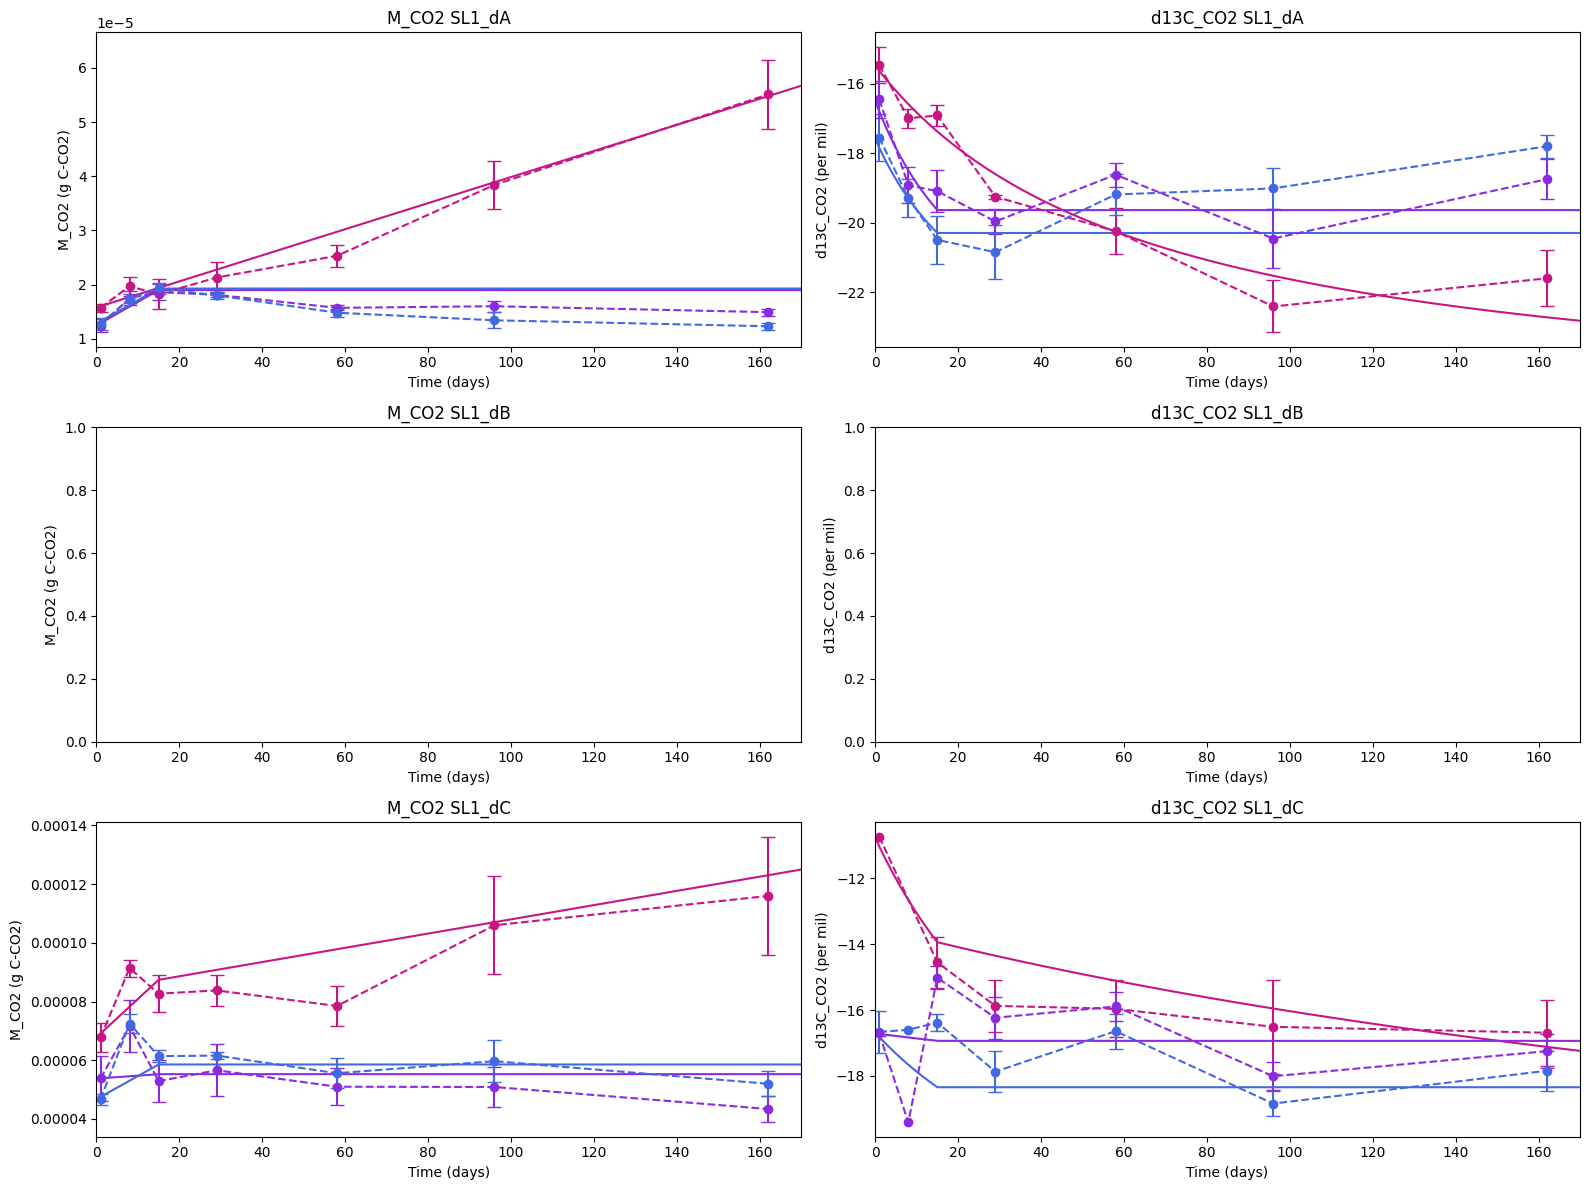

In [ ]:
#plot SL1 real data vs modeled data

cal_corr_d13C1 = cal_corr_d13C[cal_corr_d13C['Name'].apply(lambda x: x in ['SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])] #, 'SL1_dC_25C_wet'])]
filtered_data = C_data[C_data['Name'].apply(lambda x: x in ['SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])] #, 'SL1_dC_25C_wet'])]
# filtered_d13C = new_d13C[new_d13C['Name'].apply(lambda x: x in ['SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])] #, 'SL1_dC_25C_wet'])]

unique_names = pd.concat([filtered_data['Name'], cal_corr_d13C1['Name']]).unique()
colors = ['mediumvioletred', 'blueviolet', 'royalblue'] #, 'darkgreen'] #['darkolivegreen', 'green', 'palegreen', 'darkgreen'] # 'indigo', 'purple', 'orchid']
name_color_map = {name: colors[i % len(colors)] for i, name in enumerate(unique_names)}

# Create the figure and axes
fig, axes = plt.subplots(3,2, figsize=(16, 12))  # Adjust figure size if needed
# Access individual axes
ax = axes[0, 0]  # Top-left subplot (SL1_dA CO2)
ax1 = axes[0, 1]  # Top-right subplot (SL1_dA d13C)
ax2 = axes[1, 0]  # Bottom-left subplot (SL1_dB CO2)
ax3 = axes[1, 1]  # Bottom-right subplot (SL1_dB d13C)
ax4 = axes[2, 0]  # Bottom-left subplot (SL1_dC CO2)
ax5 = axes[2, 1]  # Bottom-right subplot (SL1_dC d13C)

# Plot the data
for i, name in enumerate(filtered_data['Name'].unique()):
  if name in ['SL1_dA_6C', 'SL1_dA_25C', 'SL1_dA_2C']: #'SL1_dA_25C',, 'SL1_dA_2C'
      subset = filtered_data[filtered_data['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=colors[i % len(colors)], capsize=5,
                  label=name, marker='o', linestyle='--', color=colors[i % len(colors)])


for i, name in enumerate(cal_corr_d13C1['Name'].unique()):
  if name in ['SL1_dA_6C', 'SL1_dA_25C', 'SL1_dA_2C']: #'SL1_dA_25C',
      subset = cal_corr_d13C1[cal_corr_d13C1['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax1.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='--', color=name_color_map[name])

# for i, name in enumerate(filtered_data['Name'].unique()):
#   if name in ['SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C']:
#       subset = filtered_data[filtered_data['Name'] == name]
#       mask = ~np.isnan(subset['total C-CO2 (g)'])
#       ax2.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
#                   yerr=subset['SE total C-CO2 (g)'][mask], ecolor=colors[i % len(colors)], capsize=5,
#                   label=name, marker='o', linestyle='--', color=colors[i % len(colors)])


# for i, name in enumerate(cal_corr_d13C1['Name'].unique()):
#   if name in ['SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C']: #, 'SL1_dB_6C', 'SL1_dB_2C'
#       subset = cal_corr_d13C[cal_corr_d13C['Name'] == name].copy()
#       subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
#       mask = ~np.isnan(subset['cal corr d13C-CO2'])
#       ax3.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
#                    yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
#                    label=name, marker='o', linestyle='--', color=name_color_map[name])

for i, name in enumerate(filtered_data['Name'].unique()):
  if name in ['SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C']:
      subset = filtered_data[filtered_data['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax4.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=colors[i % len(colors)], capsize=5,
                  label=name, marker='o', linestyle='--', color=colors[i % len(colors)])


for i, name in enumerate(cal_corr_d13C1['Name'].unique()):
  if name in ['SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C']:
      subset = cal_corr_d13C1[cal_corr_d13C1['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax5.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='--', color=name_color_map[name])

# Loop through the results and plot each sample
for i, (name, data) in enumerate(results.items()):
  if name in ['SL1_dA_6C', 'SL1_dA_25C', 'SL1_dA_2C']: #'SL1_dA_25C',
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax.plot(time_points, M_CO2_values, label=name, color=colors[i % len(colors)])

for i, (name, data) in enumerate(results.items()):
  if name in ['SL1_dA_6C', 'SL1_dA_25C', 'SL1_dA_2C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax1.plot(time_points, d13C_CO2_values, label=name, color=colors[i % len(colors)])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
#       ax2.plot(time_points, M_CO2_values, label=name, color=colors[i % len(colors)])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
#       ax3.plot(time_points, d13C_CO2_values, label=name, color=colors[i % len(colors)])

for i, (name, data) in enumerate(results.items()):
  if name in ['SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax4.plot(time_points, M_CO2_values, label=name, color=colors[i % len(colors)])

for i, (name, data) in enumerate(results.items()):
  if name in ['SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C']: #, 'SL1_dC_6C', 'SL1_dC_2C'
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax5.plot(time_points, d13C_CO2_values, label=name, color=colors[i % len(colors)])

# Customize the plot
ax.set_xlabel("Time (days)")
ax.set_xlim(0,170)
ax.set_ylabel("M_CO2 (g C-CO2)")
# ax.set_ylim(0, 0.0001)
ax.set_title("M_CO2 SL1_dA")
# ax.grid(True)
# ax.legend(loc='upper left')

# Customize the plot
ax1.set_xlabel("Time (days)")
ax1.set_xlim(0,170)
ax1.set_ylabel("d13C_CO2 (per mil)")
# ax1.set_ylim(-23, -12)
ax1.set_title("d13C_CO2 SL1_dA")
# ax1.grid(True)
# ax1.legend(loc='upper right')

# Customize the plot
ax2.set_xlabel("Time (days)")
ax2.set_xlim(0,170)
ax2.set_ylabel("M_CO2 (g C-CO2)")
# ax2.set_ylim(0, 0.0001)
ax2.set_title("M_CO2 SL1_dB")
# ax2.grid(True)
# ax2.legend(loc='upper right')

# Customize the plot
ax3.set_xlabel("Time (days)")
ax3.set_xlim(0,170)
ax3.set_ylabel("d13C_CO2 (per mil)")
# ax3.set_ylim(-21, -15)
ax3.set_title("d13C_CO2 SL1_dB")
# ax3.grid(True)
# ax3.legend(loc='upper right')

# Customize the plot
ax4.set_xlabel("Time (days)")
ax4.set_xlim(0,170)
ax4.set_ylabel("M_CO2 (g C-CO2)")
# ax4.set_ylim(0, 0.0002)
ax4.set_title("M_CO2 SL1_dC")
# ax4.grid(True)
# ax4.legend(loc='upper right')

# Customize the plot
ax5.set_xlabel("Time (days)")
ax5.set_xlim(0,170)
ax5.set_ylabel("d13C_CO2 (per mil)")
# ax5.set_ylim(-25, -8)
ax5.set_title("d13C_CO2 SL1_dC")
# ax5.grid(True)
# ax5.legend(loc='upper right')

# Show the plot
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

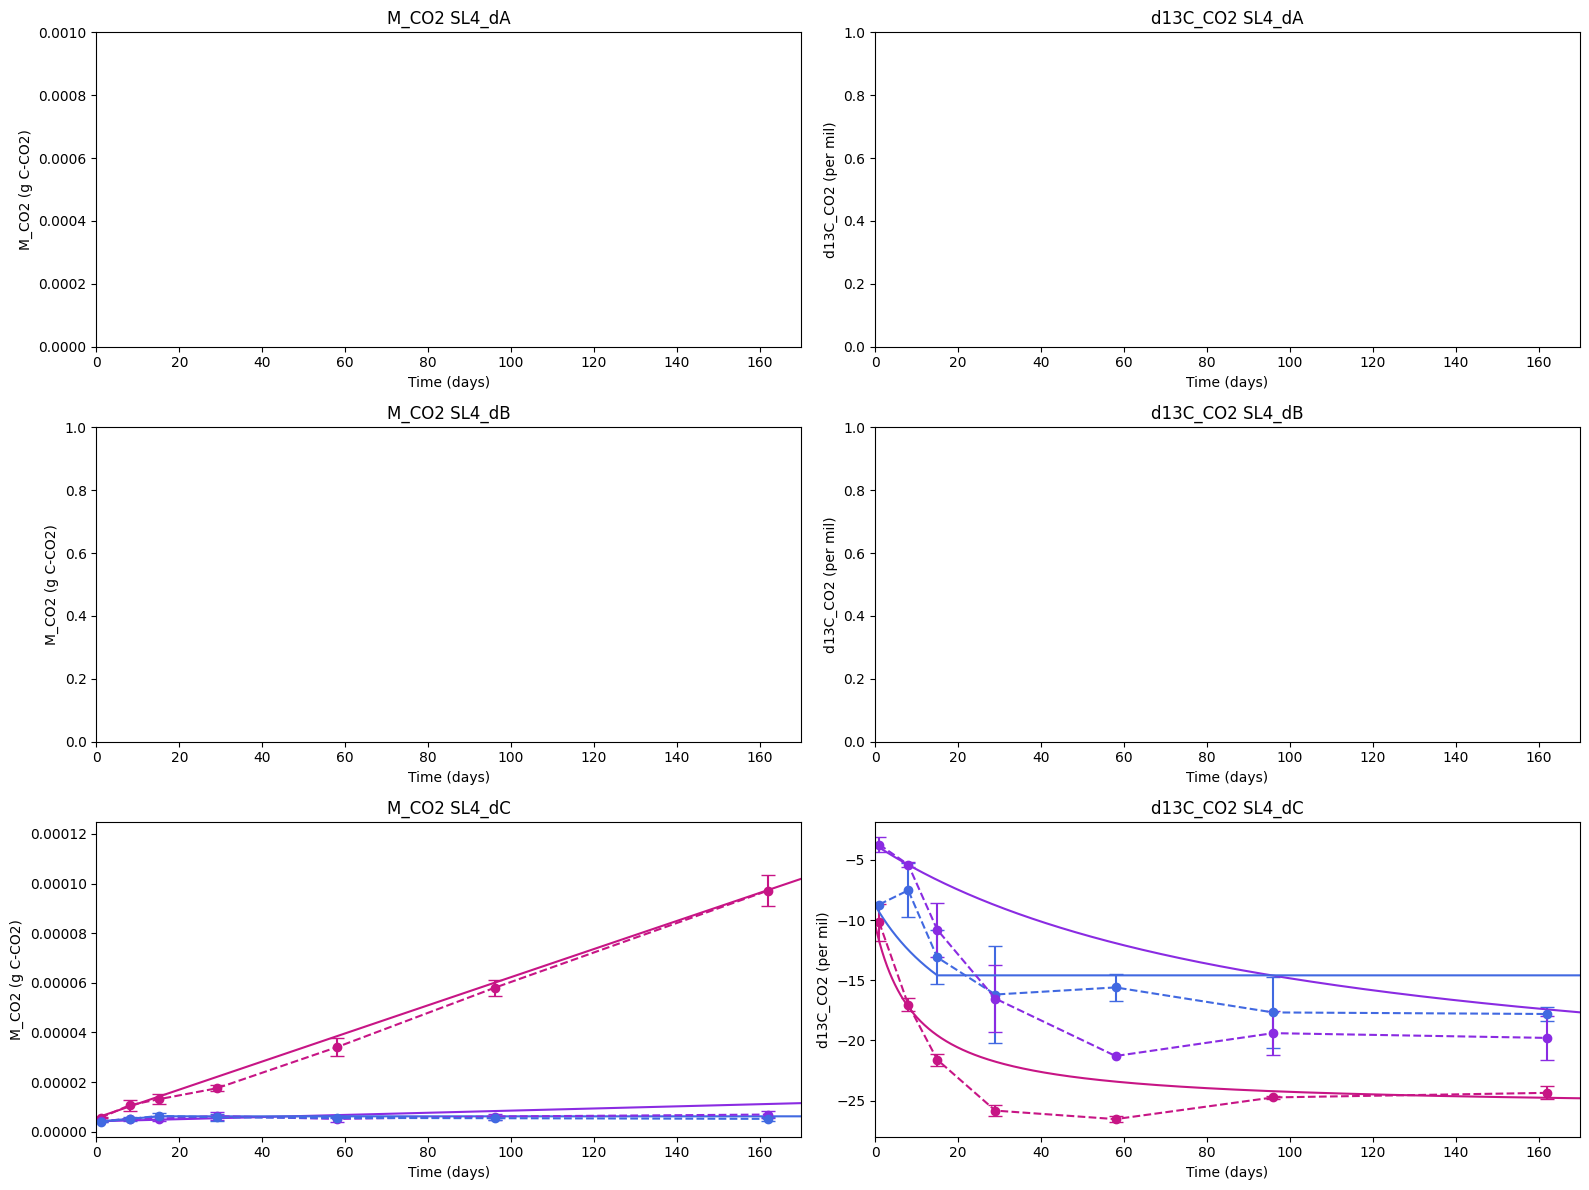

In [ ]:
#plot SL4 real data vs modeled data

filtered_data2 = C_data[C_data['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C'])]
filtered_d13C2 = new_d13C[new_d13C['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C'])]

cal_corr_d13C2 = cal_corr_d13C[cal_corr_d13C['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C'])] #, 'SL1_dC_25C_wet'])]

unique_names = pd.concat([filtered_data2['Name'], cal_corr_d13C2['Name']]).unique()
colors = ['mediumvioletred', 'blueviolet', 'royalblue'] #', 'darkgreen'] # 'indigo', 'purple', 'orchid']
name_color_map = {name: colors[i % len(colors)] for i, name in enumerate(unique_names)}


# Create the figure and axes
fig, axes = plt.subplots(3,2, figsize=(16, 12))  # Adjust figure size if needed
# Access individual axes
ax = axes[0, 0]  # Top-left subplot (SL1_dA CO2)
ax1 = axes[0, 1]  # Top-right subplot (SL1_dA d13C)
ax2 = axes[1, 0]  # Bottom-left subplot (SL1_dB CO2)
ax3 = axes[1, 1]  # Bottom-right subplot (SL1_dB d13C)
ax4 = axes[2, 0]  # Bottom-left subplot (SL1_dC CO2)
ax5 = axes[2, 1]  # Bottom-right subplot (SL1_dC d13C)

# Plot the data
# for i, name in enumerate(filtered_data2['Name'].unique()):
#   if name in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C']:
#       subset = filtered_data2[filtered_data2['Name'] == name]
#       mask = ~np.isnan(subset['total C-CO2 (g)'])
#       ax.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
#                   yerr=subset['SE total C-CO2 (g)'][mask], ecolor=colors[i % len(colors)], capsize=5,
#                   label=name, marker='o', linestyle='--', color=colors[i % len(colors)])


# for i, name in enumerate(cal_corr_d13C2['Name'].unique()):
#   if name in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C']:
#       subset = cal_corr_d13C2[cal_corr_d13C2['Name'] == name].copy()
#       subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
#       mask = ~np.isnan(subset['cal corr d13C-CO2'])
#       ax1.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
#                    yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
#                    label=name, marker='o', linestyle='--', color=name_color_map[name])

# for i, name in enumerate(filtered_data2['Name'].unique()):
#   if name in ['SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C']:
#       subset = filtered_data2[filtered_data2['Name'] == name]
#       mask = ~np.isnan(subset['total C-CO2 (g)'])
#       ax2.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
#                   yerr=subset['SE total C-CO2 (g)'][mask], ecolor=colors[i % len(colors)], capsize=5,
#                   label=name, marker='o', linestyle='--', color=colors[i % len(colors)])


# for i, name in enumerate(cal_corr_d13C2['Name'].unique()):
#   if name in ['SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C']:
#       subset = cal_corr_d13C2[cal_corr_d13C2['Name'] == name].copy()
#       subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
#       mask = ~np.isnan(subset['cal corr d13C-CO2'])
#       ax3.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
#                    yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
#                    label=name, marker='o', linestyle='--', color=name_color_map[name])

for i, name in enumerate(filtered_data2['Name'].unique()):
  if name in ['SL4_dC_2C', 'SL4_dC_6C', 'SL4_dC_25C']:
      subset = filtered_data2[filtered_data2['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax4.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=colors[i % len(colors)], capsize=5,
                  label=name, marker='o', linestyle='--', color=colors[i % len(colors)])


for i, name in enumerate(cal_corr_d13C2['Name'].unique()):
  if name in ['SL4_dC_2C', 'SL4_dC_6C', 'SL4_dC_25C']:
      subset = cal_corr_d13C2[cal_corr_d13C2['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax5.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='--', color=name_color_map[name])

# Loop through the results and plot each sample
# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
#       ax.plot(time_points, M_CO2_values, label=name, color=colors[(i+2) % len(colors)])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
#       ax1.plot(time_points, d13C_CO2_values, label=name, color=colors[(i+2) % len(colors)])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C']: #, 'SL4_dB_6C', 'SL4_dB_2C'
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
#       ax2.plot(time_points, M_CO2_values, label=name, color=colors[(i+2) % len(colors)])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
#       ax3.plot(time_points, d13C_CO2_values, label=name, color=colors[(i+2) % len(colors)])

for i, (name, data) in enumerate(results.items()):
  if name in ['SL4_dC_2C', 'SL4_dC_6C', 'SL4_dC_25C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax4.plot(time_points, M_CO2_values, label=name, color=colors[(i+2) % len(colors)])

for i, (name, data) in enumerate(results.items()):
  if name in ['SL4_dC_2C', 'SL4_dC_6C', 'SL4_dC_25C']: #, 'SL4_dC_6C', 'SL4_dC_2C'
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax5.plot(time_points, d13C_CO2_values, label=name, color=colors[(i+2) % len(colors)])

# Customize the plot
ax.set_xlabel("Time (days)")
ax.set_xlim(0,170)
ax.set_ylabel("M_CO2 (g C-CO2)")
ax.set_ylim(0, 0.001)
ax.set_title("M_CO2 SL4_dA")
# ax.grid(True)
# ax.legend(loc='upper left')

# Customize the plot
ax1.set_xlabel("Time (days)")
ax1.set_xlim(0,170)
ax1.set_ylabel("d13C_CO2 (per mil)")
# ax1.set_ylim(-25, 0)
ax1.set_title("d13C_CO2 SL4_dA")
# ax1.grid(True)
# ax1.legend(loc='upper right')

# Customize the plot
ax2.set_xlabel("Time (days)")
ax2.set_xlim(0,170)
ax2.set_ylabel("M_CO2 (g C-CO2)")
# ax2.set_ylim(0, 0.0001)
ax2.set_title("M_CO2 SL4_dB")
# ax2.grid(True)
# ax2.legend(loc='upper right')

# Customize the plot
ax3.set_xlabel("Time (days)")
ax3.set_xlim(0,170)
ax3.set_ylabel("d13C_CO2 (per mil)")
# ax3.set_ylim(-25, 0)
ax3.set_title("d13C_CO2 SL4_dB")
# ax3.grid(True)
# ax3.legend(loc='upper right')

# Customize the plot
ax4.set_xlabel("Time (days)")
ax4.set_xlim(0,170)
ax4.set_ylabel("M_CO2 (g C-CO2)")
# ax4.set_ylim(0, 0.0001)
ax4.set_title("M_CO2 SL4_dC")
# ax4.grid(True)
# ax4.legend(loc='upper right')

# Customize the plot
ax5.set_xlabel("Time (days)")
ax5.set_xlim(0,170)
ax5.set_ylabel("d13C_CO2 (per mil)")
# ax5.set_ylim(-25, 0)
ax5.set_title("d13C_CO2 SL4_dC")
# ax5.grid(True)
# ax5.legend(loc='upper right')

# Show the plot
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

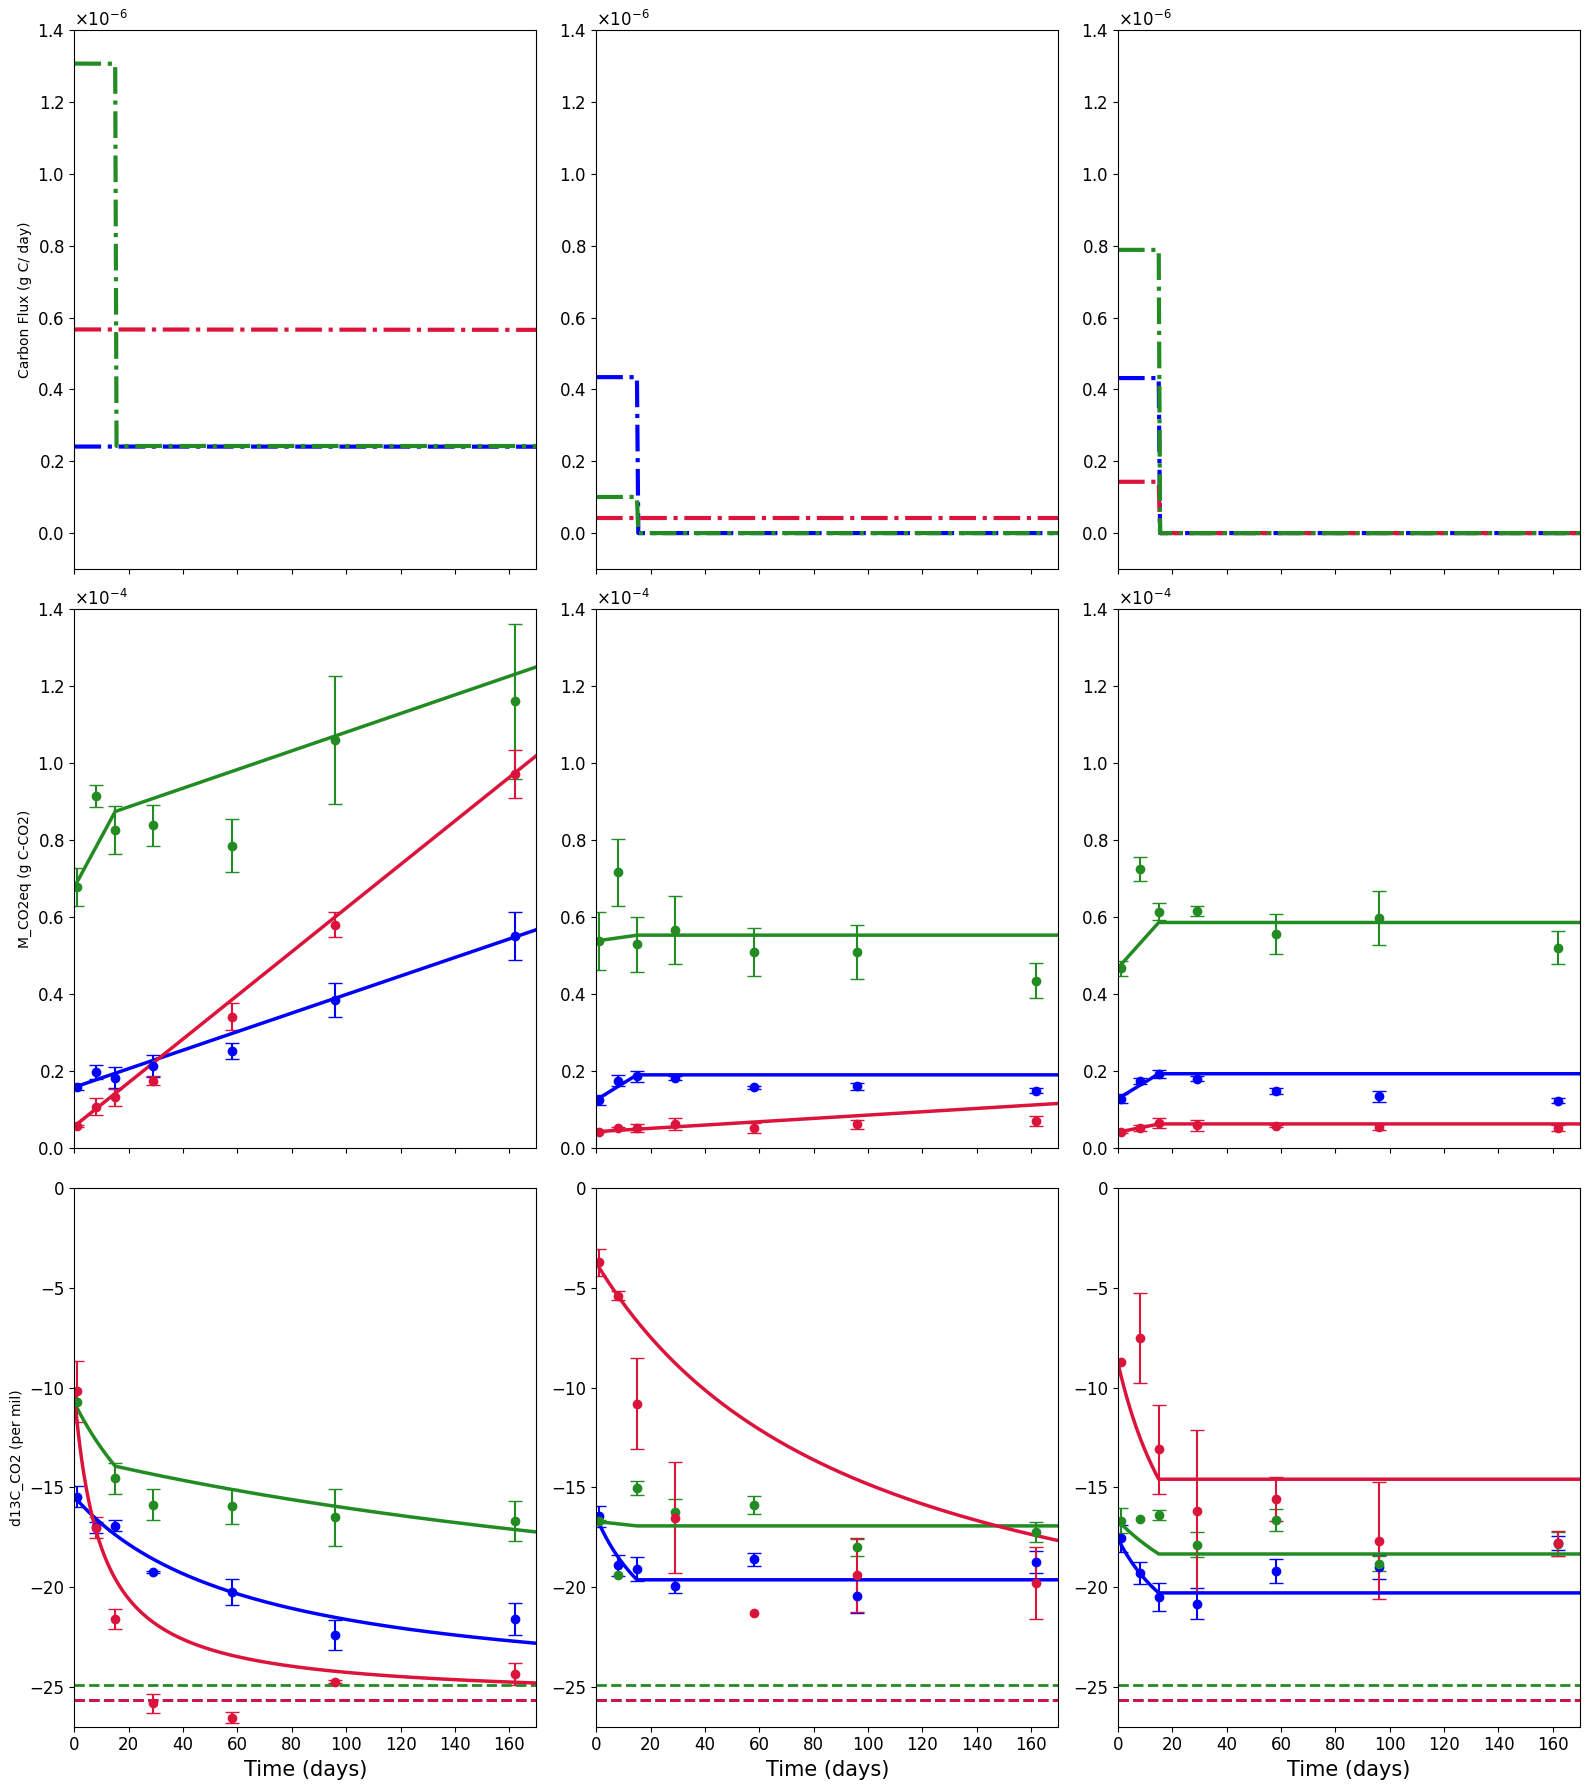

In [ ]:
#plot all data together

filtered_data3 = C_data[C_data['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C', 'SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])]
filtered_d13C = new_d13C[new_d13C['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C', 'SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])]

cal_corr_d13C3 = cal_corr_d13C[cal_corr_d13C['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C', 'SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])] #, 'SL1_dC_25C_wet'])]

unique_names = pd.concat([filtered_data3['Name'], cal_corr_d13C3['Name']]).unique()
colors = ['mediumvioletred', 'blueviolet', 'royalblue'] #', 'darkgreen'] # 'indigo', 'purple', 'orchid']
name_color_map = {
    'SL4_dA_25C': 'indigo',
    'SL4_dA_6C': 'indigo',
    'SL4_dA_2C': 'indigo',
    'SL4_dB_25C': 'purple',
    'SL4_dB_6C': 'purple',
    'SL4_dB_2C': 'purple',
    'SL4_dC_25C': 'crimson', #'purple',
    'SL4_dC_6C': 'crimson', #'purple',
    'SL4_dC_2C': 'crimson', #'purple',
    'SL1_dA_25C': 'blue',
    'SL1_dA_6C': 'blue',
    'SL1_dA_2C': 'blue',
    'SL1_dB_25C': 'darkgreen',
    'SL1_dB_6C': 'darkgreen',
    'SL1_dB_2C': 'darkgreen',
    'SL1_dC_25C': 'forestgreen', #'darkgreen',
    'SL1_dC_6C': 'forestgreen', #'darkgreen',
    'SL1_dC_2C': 'forestgreen', #'darkgreen',
} #{name: colors[i % len(colors)] for i, name in enumerate(unique_names)}

linestyle_map = {
    'SL4_dC_25C': 'dashdot', #'dashdot',
    'SL4_dC_6C': 'dashdot', #'dashdot',
    'SL4_dC_2C': 'dashdot', #'dashdot',
    'SL1_dA_25C': 'dashdot', #'solid', #(5,(10,3)),
    'SL1_dA_6C': 'dashdot', #'solid', #(5,(10,3)),
    'SL1_dA_2C': 'dashdot', #'solid', #(5,(10,3)),
    'SL1_dC_25C': 'dashdot', #(0,(3,1,1,1,1,1)),
    'SL1_dC_6C': 'dashdot', #(0,(3,1,1,1,1,1)),
    'SL1_dC_2C': 'dashdot', #(0,(3,1,1,1,1,1)),
}


# Create the figure and axes
fig, axes = plt.subplots(3,3, figsize=(16, 18), sharex=True)  # Adjust figure size if needed
# Access individual axes

#far left col
ax = axes[0, 0]  # Top-left subplot (SL1_dA CO2)
ax2 = axes[1, 0]  # Bottom-left subplot (SL1_dB CO2)
ax4 = axes[2, 0]  # Bottom-left subplot (SL1_dC CO2)

#mid col
ax6 = axes[0, 1]  # Top-right subplot (SL1_dA d13C)
ax7 = axes[1, 1]  # Bottom-right subplot (SL1_dB d13C)
ax8 = axes[2, 1]  # Bottom-right subplot (SL1_dC d13C)

#far right col
ax1 = axes[0,2]
ax3 = axes[1,2]
ax5 = axes[2,2]

# Plot the data
for i, name in enumerate(filtered_data3['Name'].unique()):
  if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']:
      subset = filtered_data3[filtered_data3['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax2.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=name_color_map[name], capsize=5,
                  label=name, marker='o', linestyle='None', color=name_color_map[name])


for i, name in enumerate(cal_corr_d13C3['Name'].unique()):
  if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']:
      subset = cal_corr_d13C3[cal_corr_d13C3['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax4.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='None', color=name_color_map[name])

for i, name in enumerate(filtered_data3['Name'].unique()):
  if name in ['SL4_dC_2C', 'SL1_dA_2C', 'SL1_dC_2C']:
      subset = filtered_data3[filtered_data3['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax3.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=name_color_map[name], capsize=5,
                  label=name, marker='o', linestyle='None', color=name_color_map[name])


for i, name in enumerate(cal_corr_d13C3['Name'].unique()):
  if name in ['SL4_dC_2C', 'SL1_dA_2C', 'SL1_dC_2C']:
      subset = cal_corr_d13C3[cal_corr_d13C3['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax5.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='None', color=name_color_map[name])

for i, name in enumerate(filtered_data3['Name'].unique()):
  if name in ['SL4_dC_6C', 'SL1_dA_6C', 'SL1_dC_6C']:
      subset = filtered_data3[filtered_data3['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax7.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=name_color_map[name], capsize=5,
                  label=name, marker='o', linestyle='None', color=name_color_map[name])


for i, name in enumerate(cal_corr_d13C3['Name'].unique()):
  if name in ['SL4_dC_6C', 'SL1_dA_6C', 'SL1_dC_6C']:
      subset = cal_corr_d13C3[cal_corr_d13C3['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax8.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='None', color=name_color_map[name])

def plot_flux_lines(ax, name_list, selected_times, results, name_color_map, alpha_value=1, line_width=3):
    for name in name_list:
        time_points = np.array(results[name][0])
        F_ana_values = np.array(results[name][3])
        F_homo_values = np.array(results[name][5])  # Assuming F_homo is at index 5

        # Create masks for selected times
        selected_mask = np.isin(time_points, selected_times)
        times_to_plot = time_points[selected_mask]
        F_ana_to_plot = F_ana_values[selected_mask]
        F_homo_to_plot = F_homo_values[selected_mask]

        color = name_color_map[name]

        # Plot F_ana (dotted line)
        ax.plot(times_to_plot, F_ana_to_plot, linestyle=linestyle_map[name], color=color,
                linewidth=line_width, label=f'{name} F_ana', alpha=alpha_value)

        # Plot -F_homo (dashed line)
        ax.plot(times_to_plot, -F_homo_to_plot, linestyle='--', color=color,
                linewidth=line_width, label=f'{name} -F_homo')

    # ax.hlines(y=0, xmin=min(selected_times), xmax=max(selected_times), color='black', linewidth=1)


# # Define time points you want to plot
names = ['SL1_dA_25C', 'SL4_dC_25C', 'SL1_dC_25C']
mid_names = ['SL1_dA_6C', 'SL4_dC_6C', 'SL1_dC_6C']
cold_names = ['SL1_dA_2C', 'SL4_dC_2C', 'SL1_dC_2C']
selected_times = time_points[::5]
 #[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 0.9999999999999999, 8.099999999999987, 15.099999999999962, 29.000000000000142, 58.000000000000554, 96.09999999999881, 130.0999999999969, 161.99999999999508]  # Change these to your specific values


# # Fluxes
# plot_grouped_bars(ax, names, selected_times, results, name_color_map, alpha_value=0.05)
# plot_grouped_bars(ax1, cold_names, selected_times, results, name_color_map, alpha_value=0.05)
# plot_grouped_bars(ax6, mid_names, selected_times, results, name_color_map, alpha_value=0.05)
plot_flux_lines(ax, names, selected_times, results, name_color_map)
plot_flux_lines(ax1, cold_names, selected_times, results, name_color_map)
plot_flux_lines(ax6, mid_names, selected_times, results, name_color_map)



# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']: #, 'SL4_dB_6C', 'SL4_dB_2C'
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       OM_scale_values = data[2]  # Assuming M_CO2 values are the second element
#       ax.plot(time_points, OM_scale_values, label=name, color=name_color_map[name], linestyle='-')

for i, (name, data) in enumerate(results.items()):
  if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']: #, 'SL4_dB_6C', 'SL4_dB_2C'
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax2.plot(time_points, M_CO2_values, label=name, color=name_color_map[name], linestyle='-', linewidth=2.5)

for i, (name, data) in enumerate(results.items()):
  if name in ['SL1_dA_25C', 'SL4_dC_25C', 'SL1_dC_25C']: #, 'SL4_dC_25C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax4.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name], linestyle='-', linewidth=2.5)

      if name in C_k['Name'].values:
            parent_value = C_k.loc[C_k['Name'] == name, 'parent d13C'].values
            if len(parent_value) > 0 and not pd.isna(parent_value[0]):
                ax4.axhline(y=parent_value[0], color=name_color_map[name],
                            linestyle='--', linewidth=2)

for i, (name, data) in enumerate(results.items()):
  if name in ['SL4_dC_2C', 'SL1_dA_2C', 'SL1_dC_2C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax3.plot(time_points, M_CO2_values, label=name, color=name_color_map[name], linestyle='-', linewidth=2.5)

for i, (name, data) in enumerate(results.items()):
  if name in ['SL4_dC_2C', 'SL1_dA_2C', 'SL1_dC_2C']: #, 'SL4_dC_6C', 'SL4_dC_2C'
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax5.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name], linestyle='-', linewidth=2.5)

      if name in C_k['Name'].values:
            parent_value = C_k.loc[C_k['Name'] == name, 'parent d13C'].values
            if len(parent_value) > 0 and not pd.isna(parent_value[0]):
                ax5.axhline(y=parent_value[0], color=name_color_map[name],
                            linestyle='--', linewidth=2)

for i, (name, data) in enumerate(results.items()):
  if name in ['SL4_dC_6C', 'SL1_dA_6C', 'SL1_dC_6C', 'SL4_dC_6C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax7.plot(time_points, M_CO2_values, label=name, color=name_color_map[name], linestyle='-', linewidth=2.5)

for i, (name, data) in enumerate(results.items()):
  if name in ['SL1_dA_6C', 'SL1_dC_6C', 'SL4_dC_6C']: #, 'SL4_dC_6C', 'SL4_dC_2C'
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax8.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name], linestyle='-', linewidth=2.5)

      if name in C_k['Name'].values:
            parent_value = C_k.loc[C_k['Name'] == name, 'parent d13C'].values
            if len(parent_value) > 0 and not pd.isna(parent_value[0]):
                ax8.axhline(y=parent_value[0], color=name_color_map[name],
                            linestyle='--', linewidth=2)

# Use scientific notation
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))  # Force scientific notation for small numbers
formatter.set_scientific(True)



# Customize the plot
# ax.set_xlabel("Time (days)")
ax.set_xlim(0,170)
ax.set_ylabel("Carbon Flux (g C/ day)")
ax.set_ylim(-0.1e-6, 1.4e-6)
# ax.set_title(r'Carbon Flux 25$^\circ$C')
# ax.grid(True)
# ax.legend(loc='upper left')
# Use a consistent full time axis, e.g. based on all time points in the results
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.get_offset_text().set_fontsize(12)


# Customize the plot
# ax1.set_xlabel("Time (days)")
ax1.set_xlim(0,170)
# ax1.set_ylabel("Carbon Flux (g C/ day)")
ax1.set_ylim(-0.1e-6, 1.4e-6)
# ax1.set_title(r'Carbon Flux 2$^\circ$C')
# ax1.grid(True)
# ax1.legend(loc='upper right')
ax1.tick_params(axis='y', labelsize=12)
ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.get_offset_text().set_fontsize(12)

# Customize the plot
# ax2.set_xlabel("Time (days)")
ax2.set_xlim(0,170)
ax2.set_ylabel("M_CO2eq (g C-CO2)")
ax2.set_ylim(0, 1.4e-4)
# ax2.set_title(r'Carbon Mass 25$^\circ$C')
# ax2.grid(True)
# ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelsize=12)
ax2.yaxis.set_major_formatter(formatter)
ax2.yaxis.get_offset_text().set_fontsize(12)

# Customize the plot
ax4.set_xlabel("Time (days)", fontsize=15)
ax4.set_xlim(0,170)
ax4.set_ylabel("d13C_CO2 (per mil)")
ax4.set_ylim(-27, 0)
# ax4.set_title("d13C_CO2 25C")
# ax3.grid(True)
# ax3.legend(loc='upper right')
ax4.tick_params(axis='both', labelsize=12)


# Customize the plot
# ax3.set_xlabel("Time (days)")
ax3.set_xlim(0,170)
# ax3.set_ylabel("M_CO2eq (g C-CO2)")
ax3.set_ylim(0, 1.4e-4)
# ax3.set_title(r'Carbon Mass 2$^\circ$C')
# ax4.grid(True)
# ax4.legend(loc='upper right')
ax3.tick_params(axis='y', labelsize=12)
ax3.yaxis.set_major_formatter(formatter)
ax3.yaxis.get_offset_text().set_fontsize(12)

# Customize the plot
ax5.set_xlabel("Time (days)", fontsize=15)
ax5.set_xlim(0,170)
# ax5.set_ylabel("d13C_CO2 (per mil)")
ax5.set_ylim(-27, 0)
# ax5.set_title("d13C_CO2 2C")
# ax5.grid(True)
# ax5.legend(loc='upper right')
ax5.tick_params(axis='both', labelsize=12)

# ax6.set_xlabel("Time (days)")
ax6.set_xlim(0,170)
# ax6.set_ylabel("Carbon Flux (g C/ day)")
ax6.set_ylim(-0.1e-6, 1.4e-6)
# ax6.set_title(r'Carbon Flux 6$^\circ$C')
ax6.tick_params(axis='y', labelsize=12)
ax6.yaxis.set_major_formatter(formatter)
ax6.yaxis.get_offset_text().set_fontsize(12)

# ax7.set_xlabel("Time (days)")
ax7.set_xlim(0,170)
# ax7.set_ylabel("M_CO2eq (g C-CO2)")
ax7.set_ylim(0, 1.4e-4)
# ax7.set_title(r'Carbon Mass 6$^\circ$C')
ax7.tick_params(axis='y', labelsize=12)
ax7.yaxis.set_major_formatter(formatter)
ax7.yaxis.get_offset_text().set_fontsize(12)

ax8.set_xlabel("Time (days)", fontsize=15)
ax8.set_xlim(0,170)
# ax8.set_ylabel("d13C_CO2 (per mil)")
ax8.set_ylim(-27, 0)
# ax8.set_title("d13C_CO2 6C")
ax8.tick_params(axis='both', labelsize=12)

# Collect all handles and labels from all axes
# handles_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# handles, labels = zip(*handles_labels)

# # Flatten the lists
# handles = sum(handles, [])
# labels = sum(labels, [])

# # Create a dictionary to remove duplicates
# unique = dict(zip(labels, handles))

# # Add a single legend to the figure (global legend)
# fig.legend(unique.values(), unique.keys(), loc='upper center', ncol=4, bbox_to_anchor=(1.3, 1.02))

# Show the plot
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

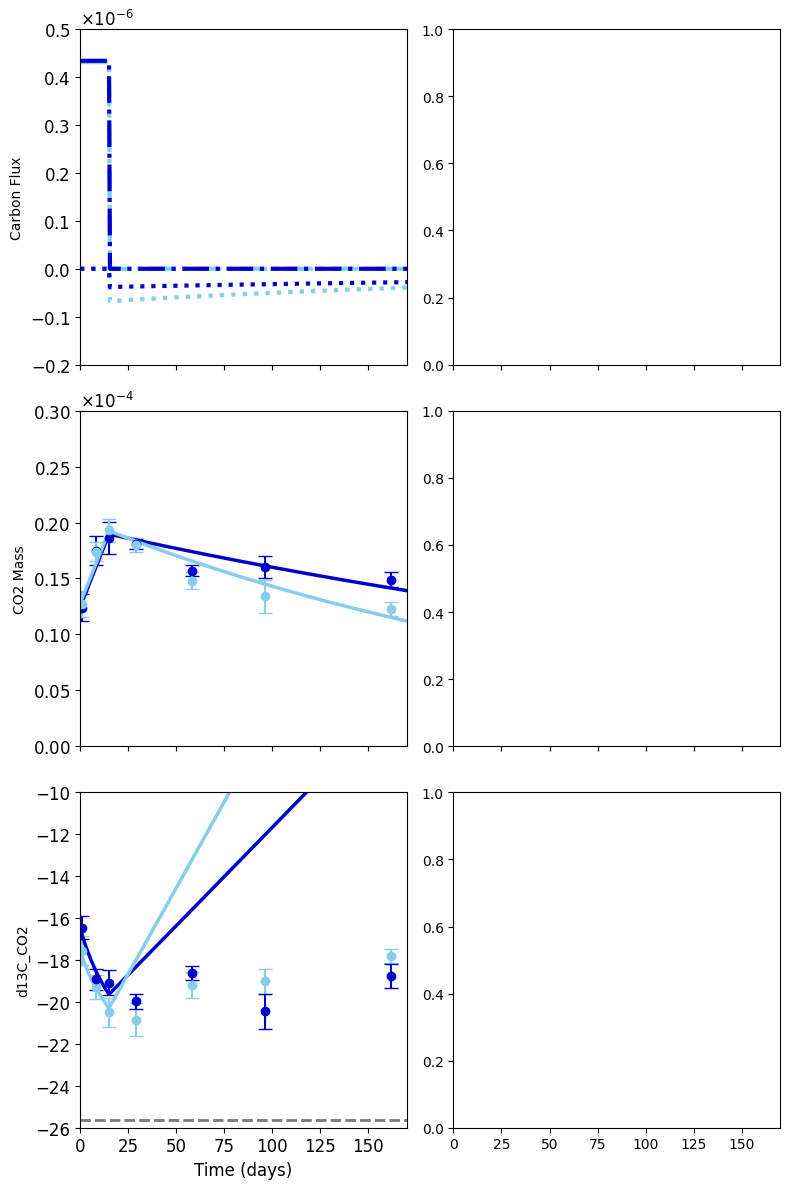

In [ ]:
#isolate SL1_dA under scenarios 1, 2, 3
filtered_data3 = C_data[C_data['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C', 'SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])]
filtered_d13C = new_d13C[new_d13C['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C', 'SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])]

cal_corr_d13C3 = cal_corr_d13C[cal_corr_d13C['Name'].apply(lambda x: x in ['SL4_dA_25C', 'SL4_dA_6C', 'SL4_dA_2C', 'SL4_dB_25C', 'SL4_dB_6C', 'SL4_dB_2C', 'SL4_dC_25C', 'SL4_dC_6C', 'SL4_dC_2C', 'SL1_dA_25C', 'SL1_dA_6C', 'SL1_dA_2C', 'SL1_dB_25C', 'SL1_dB_6C', 'SL1_dB_2C', 'SL1_dC_25C', 'SL1_dC_6C', 'SL1_dC_2C'])] #, 'SL1_dC_25C_wet'])]

unique_names = pd.concat([filtered_data3['Name'], cal_corr_d13C3['Name']]).unique()
colors = ['mediumvioletred', 'blueviolet', 'royalblue'] #', 'darkgreen'] # 'indigo', 'purple', 'orchid']
name_color_map = {
    'SL4_dA_25C': 'indigo',
    'SL4_dA_6C': 'indigo',
    'SL4_dA_2C': 'indigo',
    'SL4_dB_25C': 'purple',
    'SL4_dB_6C': 'purple',
    'SL4_dB_2C': 'purple',
    'SL4_dC_25C': 'purple',
    'SL4_dC_6C': 'purple',
    'SL4_dC_2C': 'purple',
    'SL1_dA_25C': 'mediumblue',
    'SL1_dA_6C': 'mediumblue',
    'SL1_dA_2C': 'skyblue',
    'SL1_dB_25C': 'darkgreen',
    'SL1_dB_6C': 'darkgreen',
    'SL1_dB_2C': 'darkgreen',
    'SL1_dC_25C': 'darkgreen',
    'SL1_dC_6C': 'darkgreen',
    'SL1_dC_2C': 'darkgreen',
} #{name: colors[i % len(colors)] for i, name in enumerate(unique_names)}

linewidth_map = {
    'SL1_dA_6C': 3,
    'SL1_dA_2C': 3.1,

}


# Create the figure and axes
fig, axes = plt.subplots(3,2, figsize=(8, 12), sharex=True)  # Adjust figure size if needed
# Access individual axes

#far left col
ax = axes[0, 0]  # Top-left subplot (SL1_dA CO2)
ax2 = axes[1, 0]  # Bottom-left subplot (SL1_dB CO2)
ax5 = axes[2, 0]  # Bottom-left subplot (SL1_dC CO2)

#mid col
ax3 = axes[0, 1]  # Top-right subplot (SL1_dA d13C)
ax4 = axes[1, 1]  # Bottom-right subplot (SL1_dB d13C)
ax6 = axes[2, 1]  # Bottom-right subplot (SL1_dC d13C)

# #far right col
# ax1 = axes[0,2]
# ax3 = axes[1,2]
# ax5 = axes[2,2]

# # Plot the data
# for i, name in enumerate(filtered_data3['Name'].unique()):
#   if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']:
#       subset = filtered_data3[filtered_data3['Name'] == name]
#       mask = ~np.isnan(subset['total C-CO2 (g)'])
#       ax2.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
#                   yerr=subset['SE total C-CO2 (g)'][mask], ecolor=name_color_map[name], capsize=5,
#                   label=name, marker='o', linestyle='--', color=name_color_map[name])


# for i, name in enumerate(cal_corr_d13C3['Name'].unique()):
#   if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']:
#       subset = cal_corr_d13C3[cal_corr_d13C3['Name'] == name].copy()
#       subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
#       mask = ~np.isnan(subset['cal corr d13C-CO2'])
#       ax4.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
#                    yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
#                    label=name, marker='o', linestyle='--', color=name_color_map[name])

for i, name in enumerate(filtered_data3['Name'].unique()):
  if name in ['SL1_dA_2C', 'SL1_dA_6C']:
      subset = filtered_data3[filtered_data3['Name'] == name]
      mask = ~np.isnan(subset['total C-CO2 (g)'])
      ax2.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
                  yerr=subset['SE total C-CO2 (g)'][mask], ecolor=name_color_map[name], capsize=5,
                  label=name, marker='o', linestyle='None', color=name_color_map[name])


for i, name in enumerate(cal_corr_d13C3['Name'].unique()):
  if name in ['SL1_dA_2C', 'SL1_dA_6C']:
      subset = cal_corr_d13C3[cal_corr_d13C3['Name'] == name].copy()
      subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
      mask = ~np.isnan(subset['cal corr d13C-CO2'])
      ax5.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
                   yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
                   label=name, marker='o', linestyle='None', color=name_color_map[name])

# for i, name in enumerate(filtered_data3['Name'].unique()):
#   if name in ['SL4_dC_6C', 'SL1_dA_6C']:
#       subset = filtered_data3[filtered_data3['Name'] == name]
#       mask = ~np.isnan(subset['total C-CO2 (g)'])
#       ax3.errorbar(subset['incubation time'][mask], subset['total C-CO2 (g)'][mask],
#                   yerr=subset['SE total C-CO2 (g)'][mask], ecolor=name_color_map[name], capsize=5,
#                   label=name, marker='o', linestyle='--', color=name_color_map[name])


# for i, name in enumerate(cal_corr_d13C3['Name'].unique()):
#   if name in ['SL4_dC_6C', 'SL1_dA_6C']:
#       subset = cal_corr_d13C3[cal_corr_d13C3['Name'] == name].copy()
#       subset['cal corr d13C-CO2'] = pd.to_numeric(subset['cal corr d13C-CO2'], errors='coerce')
#       mask = ~np.isnan(subset['cal corr d13C-CO2'])
#       ax4.errorbar(subset['Days of incubation'][mask], subset['cal corr d13C-CO2'][mask],
#                    yerr=subset['cal corr SE d13C-CO2'][mask], ecolor=name_color_map[name], capsize=5,
#                    label=name, marker='o', linestyle='--', color=name_color_map[name])


#for og results
def plot_flux_lines(ax, name_list, selected_times, results_lit_homo, name_color_map, alpha_value=0.8, line_width=3):
    for name in name_list:
        time_points = np.array(results_lit_homo[name][0])
        F_ana_values = np.array(results_lit_homo[name][3])
        F_aceto_values = np.array(results_lit_homo[name][4])  # Assuming F_homo is at index 5

        # Create masks for selected times
        selected_mask = np.isin(time_points, selected_times)
        times_to_plot = time_points[selected_mask]
        F_ana_to_plot = F_ana_values[selected_mask]
        F_aceto_to_plot = F_aceto_values[selected_mask]

        color = name_color_map[name]

        # Plot F_ana (dotted line)
        ax.plot(times_to_plot, F_ana_to_plot, linestyle='-.', color=color,
                linewidth=linewidth_map[name], label=f'{name} F_ana')

        # Plot -F_homo (dashed line)
        ax.plot(times_to_plot, -F_aceto_to_plot, linestyle=':', color=color,
                linewidth=linewidth_map[name], label=f'{name} -F_homo')

    # ax.hlines(y=0, xmin=min(selected_times), xmax=max(selected_times), color='black', linewidth=1)

    #for lit homo results
# def plot_flux_lines_new(ax, name_list, selected_times, results_lit_homo, name_color_map, alpha_value=0.8, line_width=2):
#     for name in name_list:
#         time_points = np.array(results_lit_homo[name][0])
#         F_ana_values = np.array(results_lit_homo[name][3])
#         F_aceto_values = np.array(results_lit_homo[name][4])  # Assuming F_homo is at index 5

#         # Create masks for selected times
#         selected_mask = np.isin(time_points, selected_times)
#         times_to_plot = time_points[selected_mask]
#         F_ana_to_plot = F_ana_values[selected_mask]
#         F_aceto_to_plot = F_aceto_values[selected_mask]

#         color = name_color_map[name]

#         # Plot F_ana (dotted line)
#         ax.plot(times_to_plot, F_ana_to_plot, linestyle='-.', color=color,
#                 linewidth=line_width, label=f'{name} F_ana')

#         # Plot -F_homo (dashed line)
#         ax.plot(times_to_plot, -F_aceto_to_plot, linestyle=':', color=color,
#                 linewidth=line_width, label=f'{name} -F_homo')

#     ax.hlines(y=0, xmin=min(selected_times), xmax=max(selected_times), color='black', linewidth=1)

# Define time points you want to plot
names = ['SL1_dA_2C', 'SL1_dA_6C']
# mid_names = ['SL4_dC_6C', 'SL1_dA_6C']
# cold_names = ['SL4_dC_2C', 'SL1_dA_2C']
selected_times = time_points[::5]
 #[0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999, 1.0999999999999999, 1.2, 1.3, 1.4000000000000001, 1.5000000000000002, 1.6000000000000003, 1.7000000000000004, 1.8000000000000005, 1.9000000000000006, 2.0000000000000004, 2.1000000000000005, 2.2000000000000006, 2.3000000000000007, 2.400000000000001, 2.500000000000001, 2.600000000000001, 2.700000000000001, 2.800000000000001, 2.9000000000000012, 3.0000000000000013, 3.1000000000000014, 3.2000000000000015, 3.3000000000000016, 3.4000000000000017, 3.5000000000000018, 3.600000000000002, 3.700000000000002, 0.9999999999999999, 8.099999999999987, 15.099999999999962, 29.000000000000142, 58.000000000000554, 96.09999999999881, 130.0999999999969, 161.99999999999508]  # Change these to your specific values


# Fluxes
plot_flux_lines(ax, names, selected_times, results_lit_homo, name_color_map)
# plot_flux_lines_new(ax, names, selected_times, results_lit_homo, name_color_map)
# plot_grouped_bars(ax, cold_names, selected_times, results, name_color_map, alpha_value=0.08)
# plot_grouped_bars(ax1, cold_names, selected_times, results, name_color_map, alpha_value=0.08)
# plot_grouped_bars(ax6, mid_names, selected_times, results, name_color_map, alpha_value=0.08)

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']: #, 'SL4_dB_6C', 'SL4_dB_2C'
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       OM_scale_values = data[2]  # Assuming M_CO2 values are the second element
#       ax.plot(time_points, OM_scale_values, label=name, color=name_color_map[name], linestyle='-')

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dC_25C', 'SL1_dA_25C', 'SL1_dC_25C']: #, 'SL4_dB_6C', 'SL4_dB_2C'
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
#       ax2.plot(time_points, M_CO2_values, label=name, color=name_color_map[name])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL1_dA_25C', 'SL4_dC_25C', 'SL1_dC_25C']: #, 'SL4_dC_25C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
#       ax4.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name])

      # if name in C_k['Name'].values:
      #       parent_value = C_k.loc[C_k['Name'] == name, 'parent d13C'].values
      #       if len(parent_value) > 0 and not pd.isna(parent_value[0]):
      #           ax4.axhline(y=parent_value[0], color=name_color_map[name],
      #                       linestyle=':', linewidth=1.5)

for i, (name, data) in enumerate(results_lit_homo.items()):
  if name in ['SL1_dA_2C', 'SL1_dA_6C']:
      time_points = data[0]  # Assuming time points are the first element in the tuple
      M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
      ax2.plot(time_points, M_CO2_values, label=name, color=name_color_map[name], linewidth=2.5)

for i, (name, data) in enumerate(results_lit_homo.items()):
  if name in ['SL1_dA_2C', 'SL1_dA_6C']: #, 'SL4_dC_6C', 'SL4_dC_2C'
      time_points = data[0]  # Assuming time points are the first element in the tuple
      d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
      ax5.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name], linewidth=2.5)

      if name in C_k['Name'].values:
            parent_value = C_k.loc[C_k['Name'] == name, 'parent d13C'].values
            if len(parent_value) > 0 and not pd.isna(parent_value[0]):
                ax5.axhline(y=parent_value[0], color='grey',
                            linestyle='--', linewidth=2)

# for i, (name, data) in enumerate(results_lit_homo.items()):
#   if name in ['SL1_dA_2C', 'SL1_dA_6C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
#       ax2.plot(time_points, M_CO2_values, label=name, color=name_color_map[name])

# for i, (name, data) in enumerate(results_lit_homo.items()):
#   if name in ['SL1_dA_2C', 'SL1_dA_6C']: #, 'SL4_dC_6C', 'SL4_dC_2C'
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
#       ax5.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dC_6C', 'SL1_dA_6C']:
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       M_CO2_values = data[1]  # Assuming M_CO2 values are the second element
#       ax3.plot(time_points, M_CO2_values, label=name, color=name_color_map[name])

# for i, (name, data) in enumerate(results.items()):
#   if name in ['SL4_dC_6C', 'SL1_dA_6C']: #, 'SL4_dC_6C', 'SL4_dC_2C'
#       time_points = data[0]  # Assuming time points are the first element in the tuple
#       d13C_CO2_values = data[6]  # Assuming M_CO2 values are the second element
#       ax4.plot(time_points, d13C_CO2_values, label=name, color=name_color_map[name])

#       if name in C_k['Name'].values:
#             parent_value = C_k.loc[C_k['Name'] == name, 'parent d13C'].values
#             if len(parent_value) > 0 and not pd.isna(parent_value[0]):
#                 ax4.axhline(y=parent_value[0], color=name_color_map[name],
#                             linestyle=':', linewidth=1.5)



# ax.set_xlabel("Time (days)")
# Create formatter and set power limits to force 1e-6
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-6, -6))  # Force scientific notation at 1e-6
ax.set_xlim(0,170)
ax.set_ylabel("Carbon Flux")
ax.set_ylim(-0.2e-6, 0.5e-6)
# ax.set_title(r'Carbon Flux 25$^\circ$C')
# ax.grid(True)
# ax.legend(loc='upper left')
# Use a consistent full time axis, e.g. based on all time points in the results
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.get_offset_text().set_fontsize(12)

# Customize the plot
ax5.set_xlabel("Time (days)", fontsize=12)
ax5.set_xlim(0,170)
ax5.set_ylabel("d13C_CO2")
ax5.set_ylim(-26, -10)
# ax.set_title(r'Carbon Flux 25$^\circ$C')
# ax.grid(True)
# ax.legend(loc='upper left')
# Use a consistent full time axis, e.g. based on all time points in the results
ax5.tick_params(axis='both', labelsize=12)
# ax5.yaxis.set_major_formatter(formatter)
ax5.yaxis.get_offset_text().set_fontsize(12)


# Customize the plot
formatter1 = ticker.ScalarFormatter(useMathText=True)
formatter1.set_powerlimits((-4, -4))  # Force scientific notation for small numbers
formatter1.set_scientific(True)
# ax2.set_xlabel("Time (days)")
ax2.set_xlim(0,170)
ax2.set_ylabel("CO2 Mass")
ax2.set_ylim(0, 0.3e-4)
# ax2.set_title(r'Carbon Mass 25$^\circ$C')
# ax2.grid(True)
# ax2.legend(loc='upper right')
ax2.tick_params(axis='y', labelsize=12)
ax2.yaxis.set_major_formatter(formatter1)
ax2.yaxis.get_offset_text().set_fontsize(12)

# Customize the plot
# ax4.set_xlabel("Time (days)", fontsize=15)
# ax4.set_xlim(0,170)
# ax4.set_ylabel("d13C_CO2 (per mil)")
# ax4.set_ylim(-27, 0)
# # ax4.set_title("d13C_CO2 25C")
# # ax3.grid(True)
# # ax3.legend(loc='upper right')
# ax4.tick_params(axis='both', labelsize=12)


# Customize the plot
# ax3.set_xlabel("Time (days)")
# ax3.set_xlim(0,170)
# # ax3.set_ylabel("M_CO2eq (g C-CO2)")
# ax3.set_ylim(0, 0.3e-4)
# ax3.set_title('CO2 Mass')
# # ax4.grid(True)
# # ax4.legend(loc='upper right')
# ax3.tick_params(axis='y', labelsize=12)
# ax3.yaxis.set_major_formatter(formatter)
# ax3.yaxis.get_offset_text().set_fontsize(12)


# Collect all handles and labels from all axes
# handles_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
# handles, labels = zip(*handles_labels)

# # Flatten the lists
# handles = sum(handles, [])
# labels = sum(labels, [])

# # Create a dictionary to remove duplicates
# unique = dict(zip(labels, handles))

# # Add a single legend to the figure (global legend)
# fig.legend(unique.values(), unique.keys(), loc='upper center', ncol=4, bbox_to_anchor=(1.3, 1.02))

# Show the plot
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()